Initial Observations

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('house-price-train.csv')

In [4]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
df.shape

(1460, 81)

In [6]:
# looking at data types and number of entries
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# looking at percent of missing values by column
missing = df.isna().sum()/len(df) * 100
missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

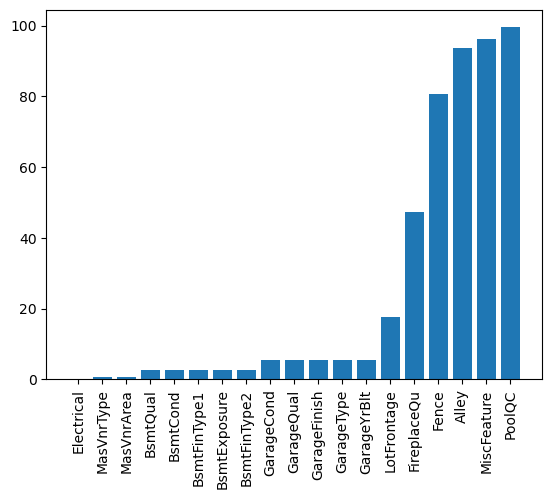

In [8]:
# visualizing percent of missing values
missing = missing[missing > 0].sort_values(ascending=True)
plt.bar(missing.index, missing)
plt.xticks(rotation=90)
plt.show()

In [9]:
# creating dfs of numeric types (removed id column) and categorical types
numeric = df.select_dtypes(include=np.number).iloc[:,1:]
numeric.head(10)
categorical = df.select_dtypes(include=object)
categorical.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


Data Quality Report

Now that I have a general feel for the data, I'd like to generate a data quality report for both our numerical and categorical features.

In [10]:
# numeric data quality report
numeric_dqr = numeric.describe(include='all').transpose()
numeric_dqr['cardinality'] = numeric.nunique()
numeric_dqr['%missing'] = numeric.isna().sum()/len(numeric)*100
numeric_dqr

,count,mean,std,min,25%,50%,75%,max,cardinality,%missing
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0,15,0.000000
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0,110,17.739726
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,1073,0.000000
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,10,0.000000
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,9,0.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,112,0.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,61,0.000000
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,327,0.547945
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,637,0.000000
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,144,0.000000


In [11]:
cols = ['Count', '%Missing', 'Cardinality', 'Mode']
categorical_dqr = pd.DataFrame(columns=cols, index=categorical.columns)

for col in categorical.columns:
    column_data = categorical[col]
    count = column_data.count()
    missing = column_data.isna().sum()/len(categorical)*100
    cardinality = column_data.nunique()
    mode = column_data.mode().iloc[0]
    categorical_dqr.loc[col, ['Count', '%Missing', 'Cardinality', 'Mode']] = [count, missing, cardinality, mode]
categorical_dqr

,Count,%Missing,Cardinality,Mode
MSZoning,1460,0.0,5,RL
Street,1460,0.0,2,Pave
Alley,91,93.767123,2,Grvl
LotShape,1460,0.0,4,Reg
LandContour,1460,0.0,4,Lvl
Utilities,1460,0.0,2,AllPub
LotConfig,1460,0.0,5,Inside
LandSlope,1460,0.0,3,Gtl
Neighborhood,1460,0.0,25,NAmes
Condition1,1460,0.0,9,Norm


Visualizations

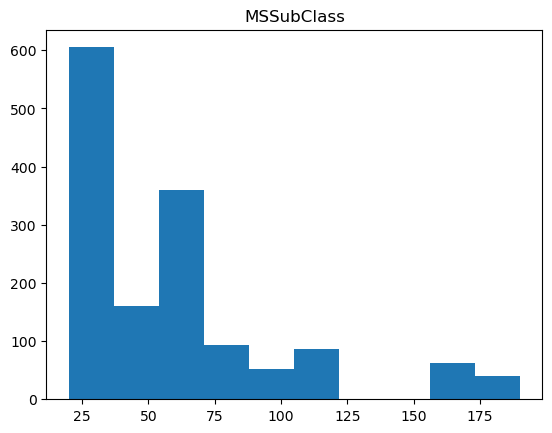

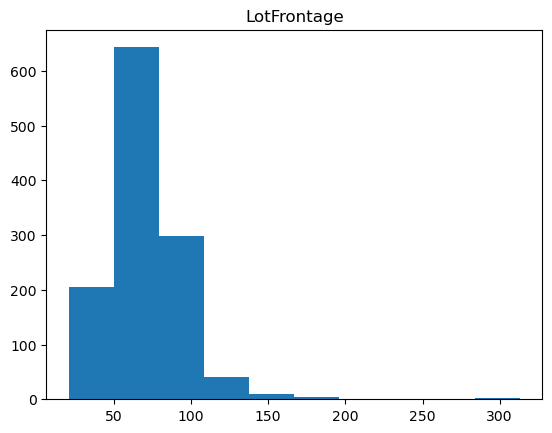

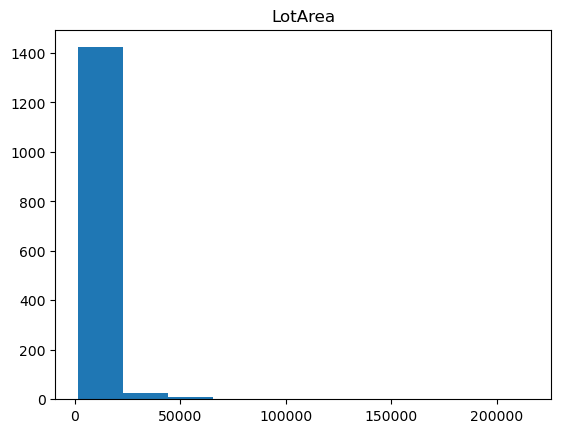

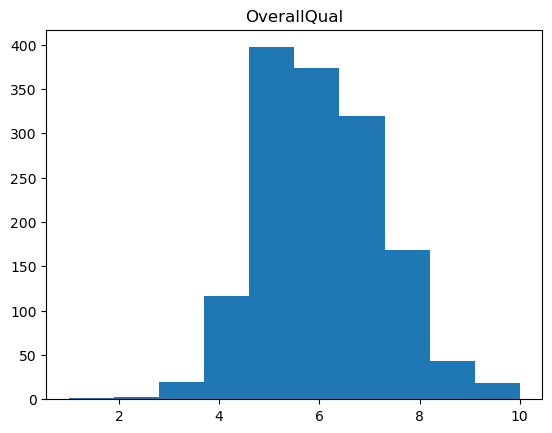

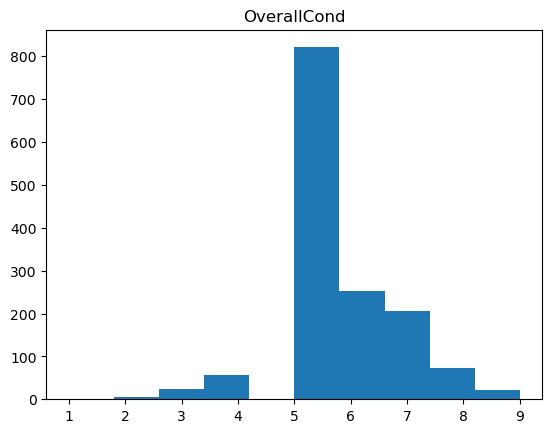

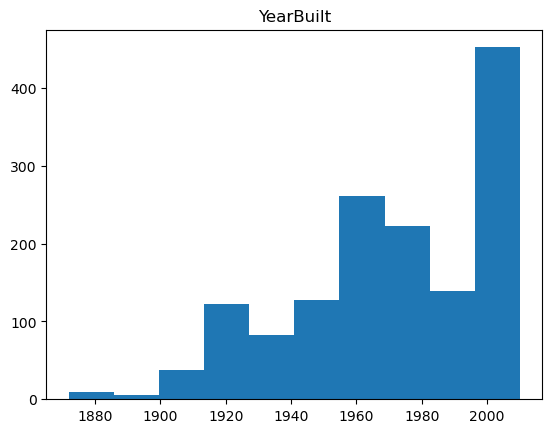

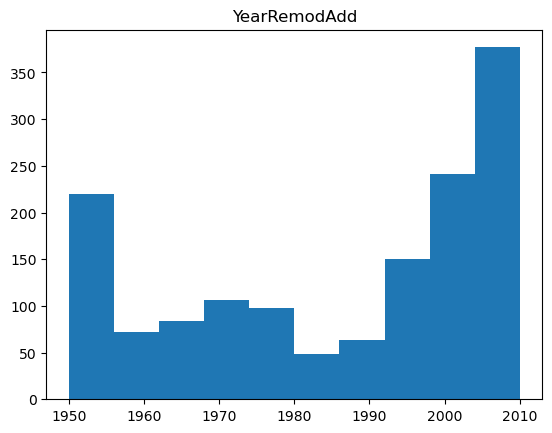

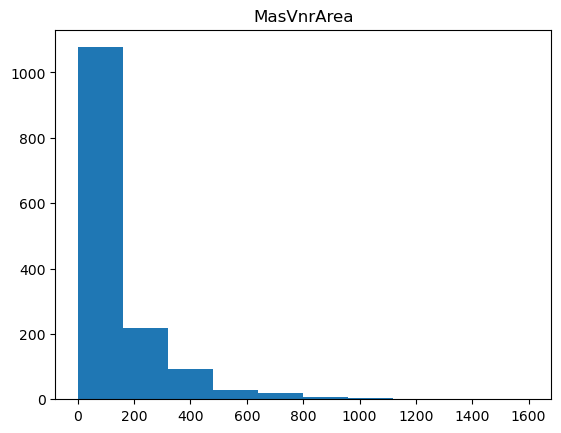

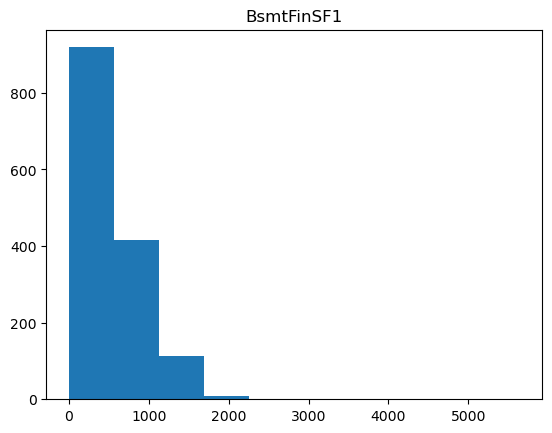

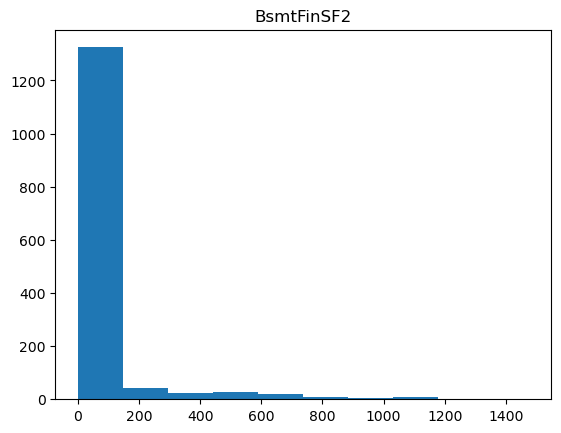

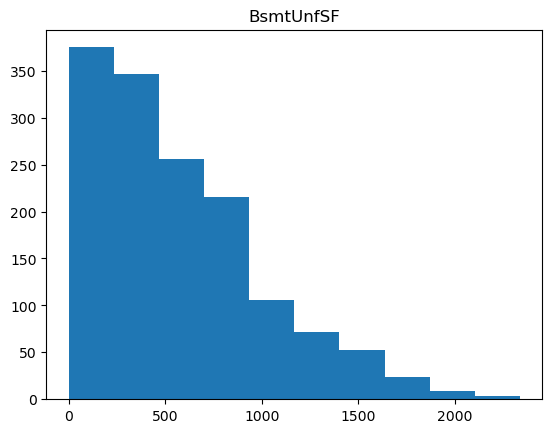

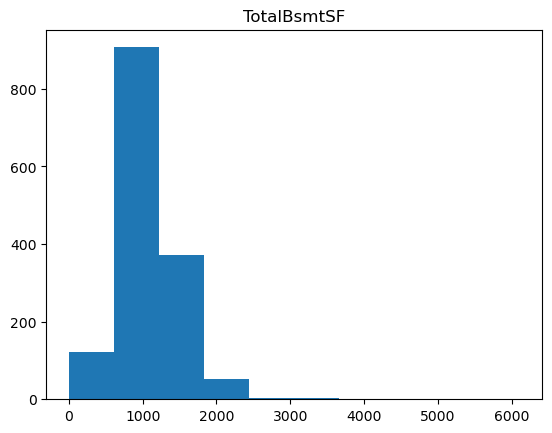

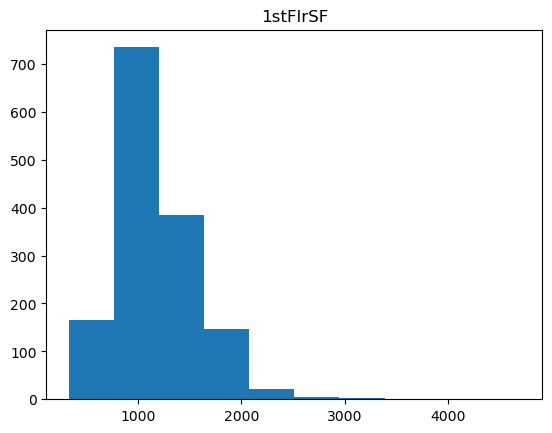

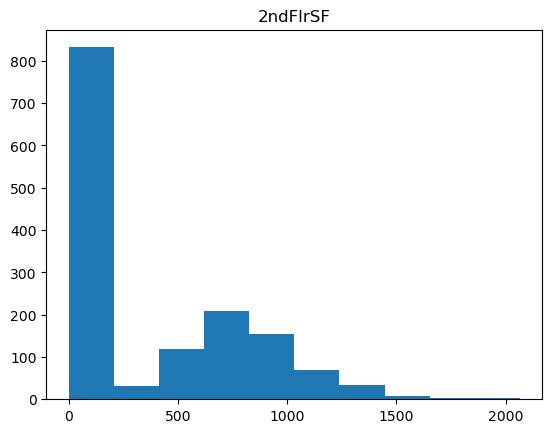

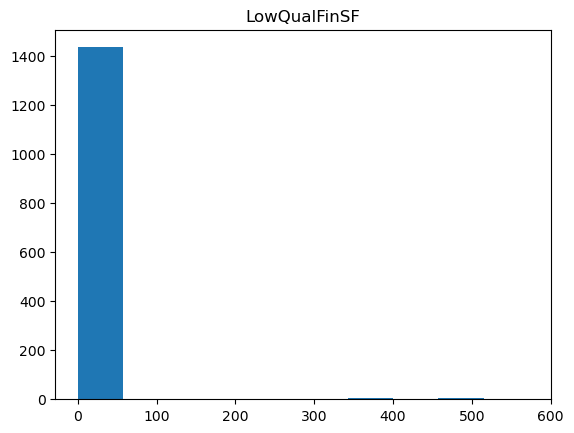

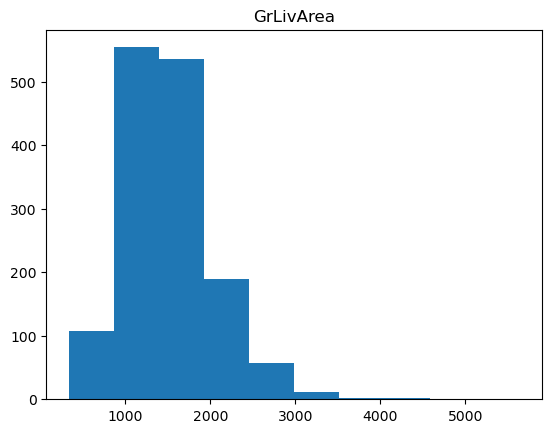

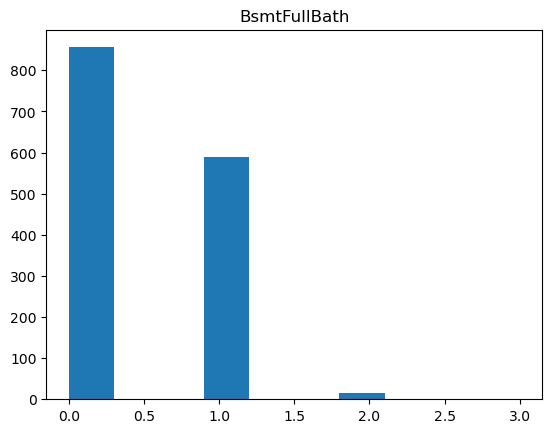

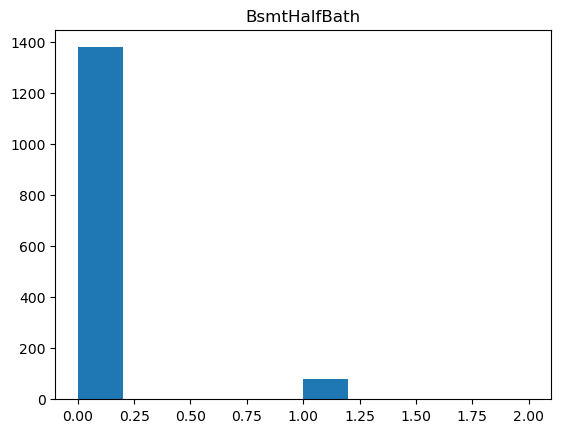

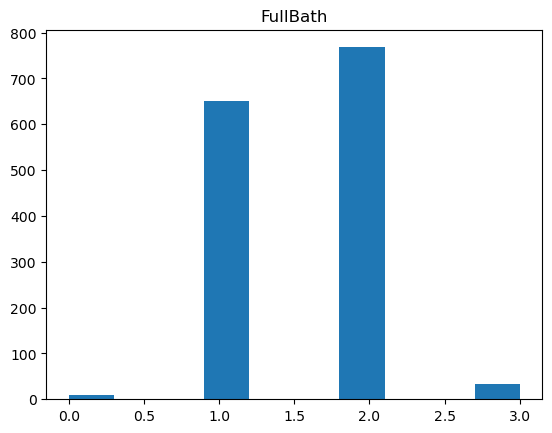

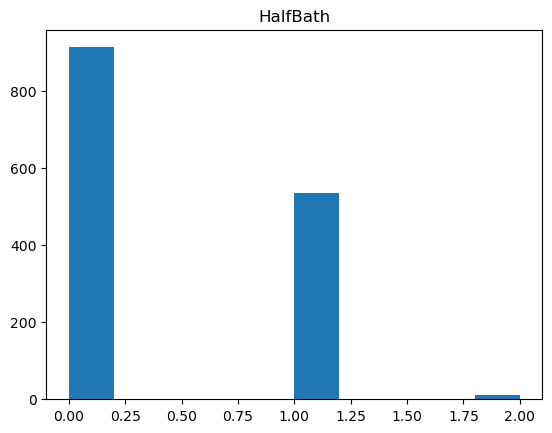

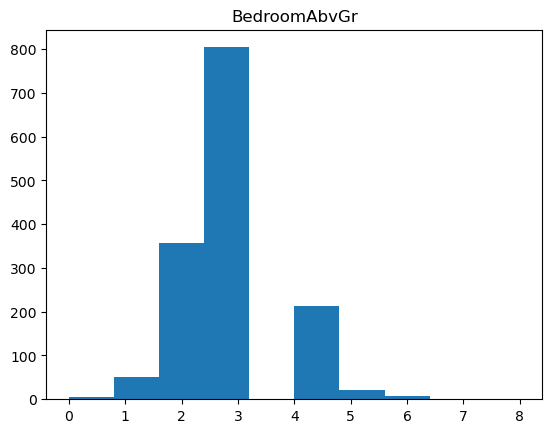

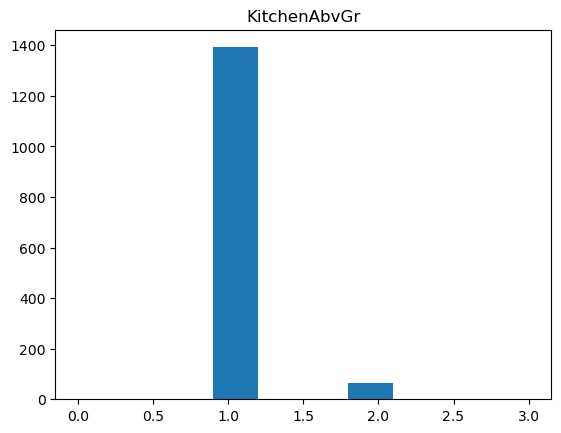

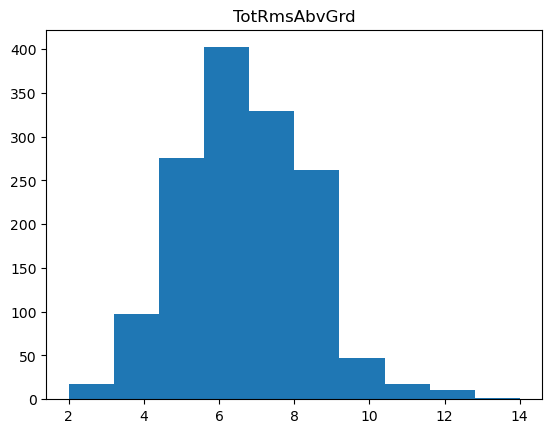

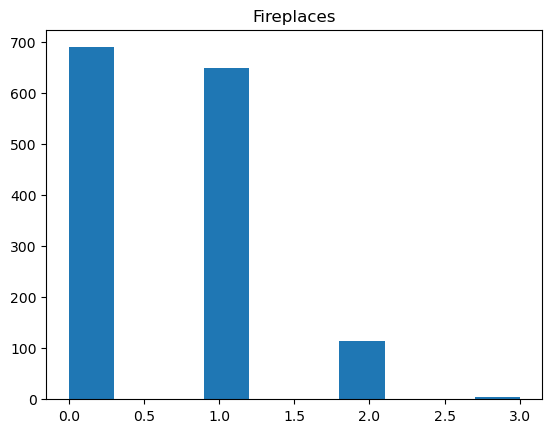

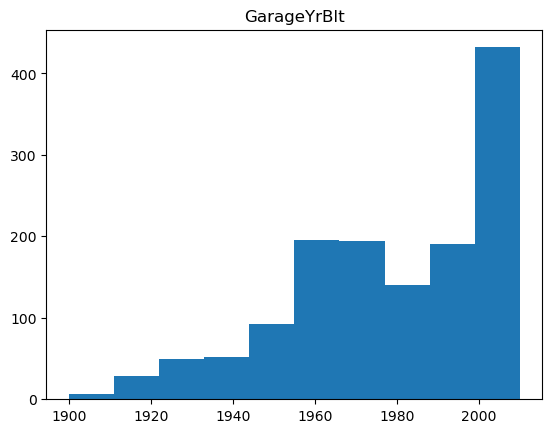

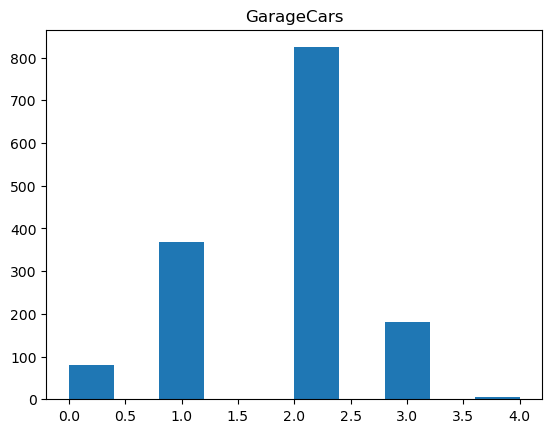

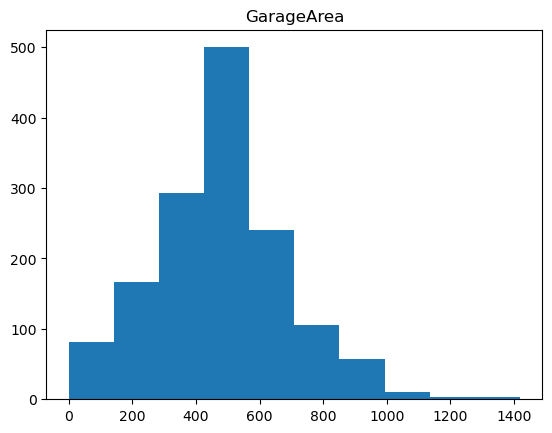

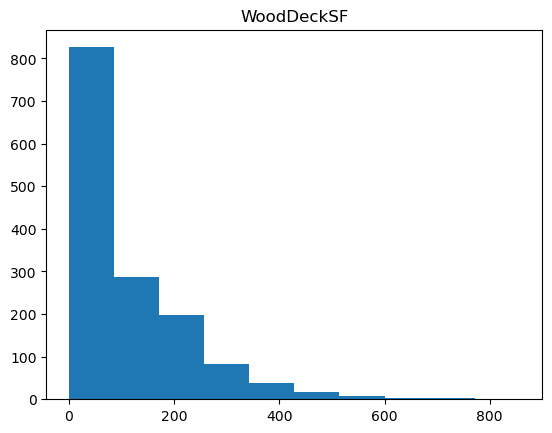

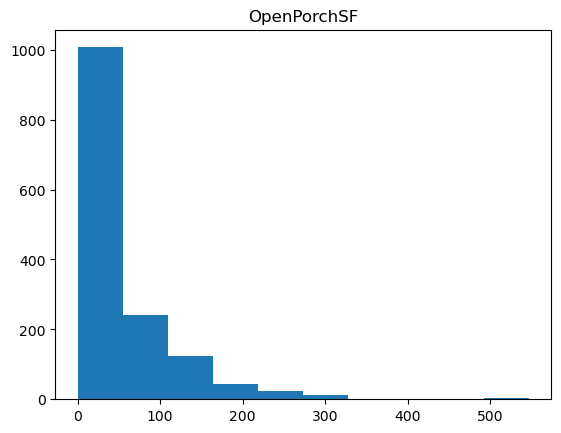

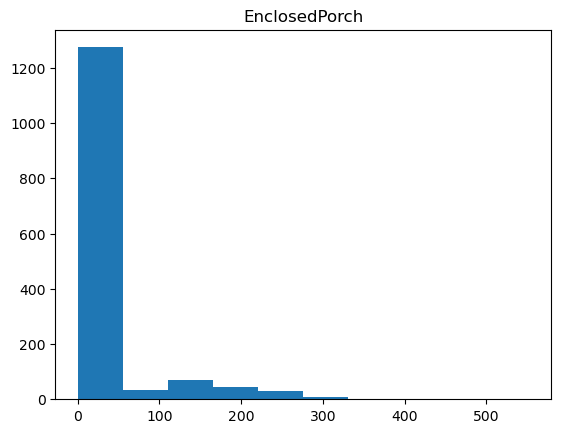

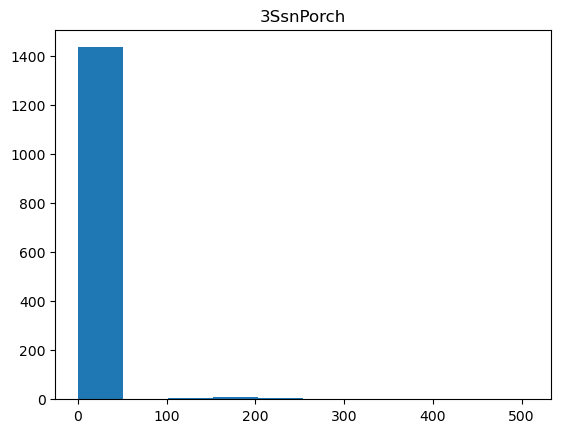

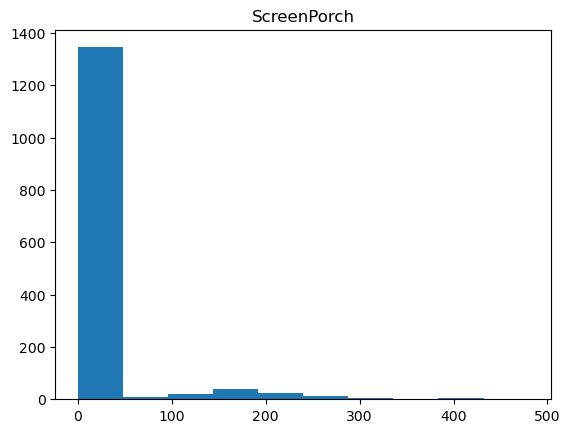

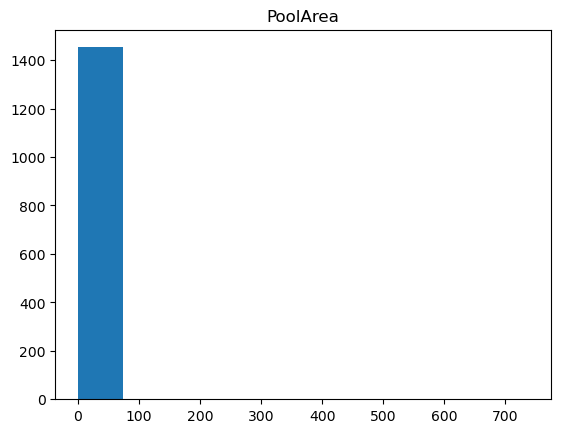

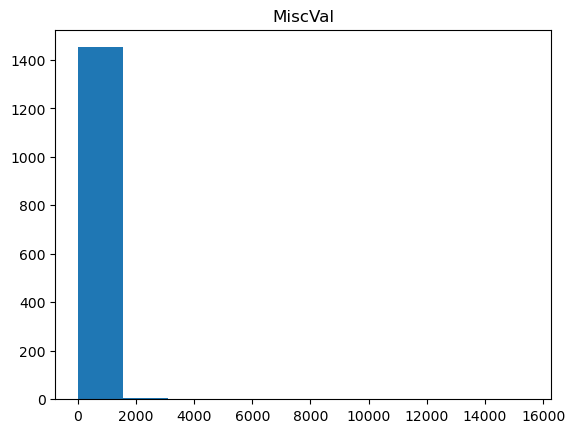

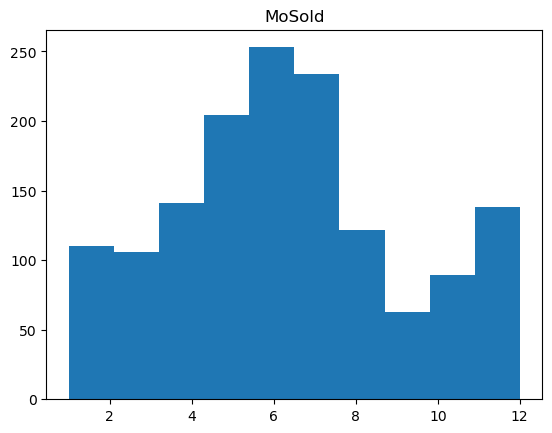

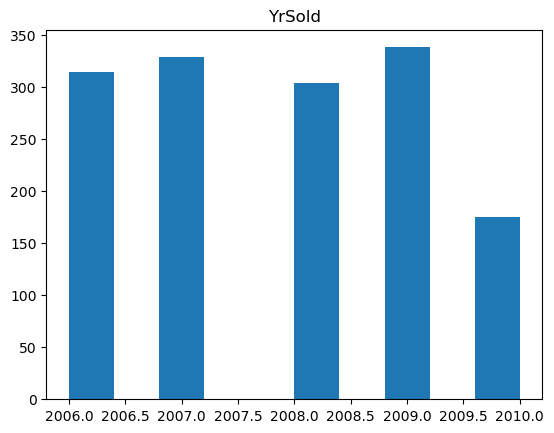

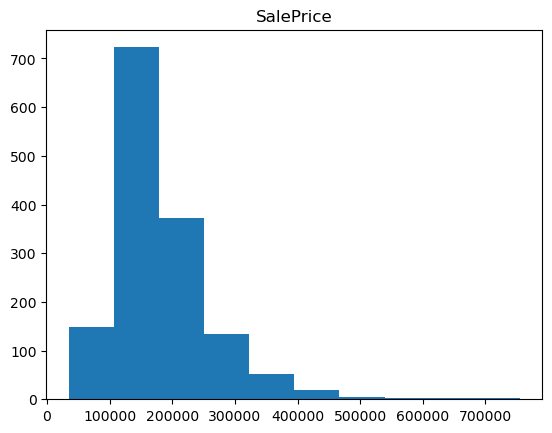

In [12]:
# visualizing the distribution of numeric columns

for col in numeric.columns:
    column_data = numeric[col]
    plt.hist(column_data)
    plt.title(col)
    plt.show()
    

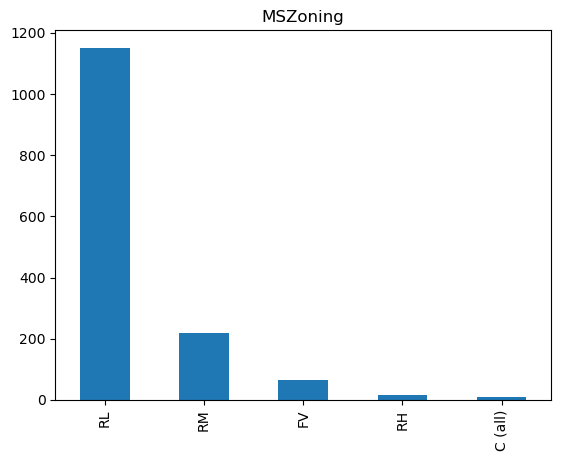

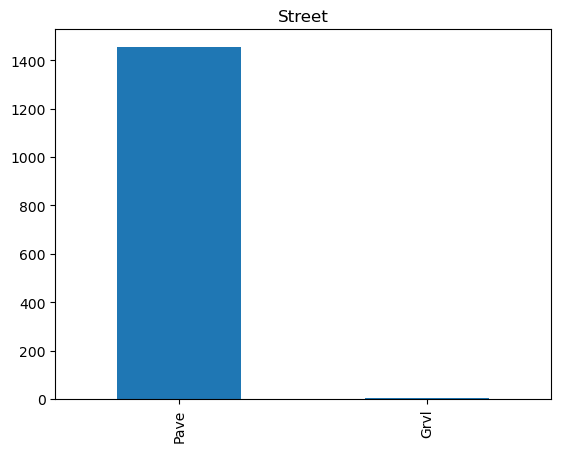

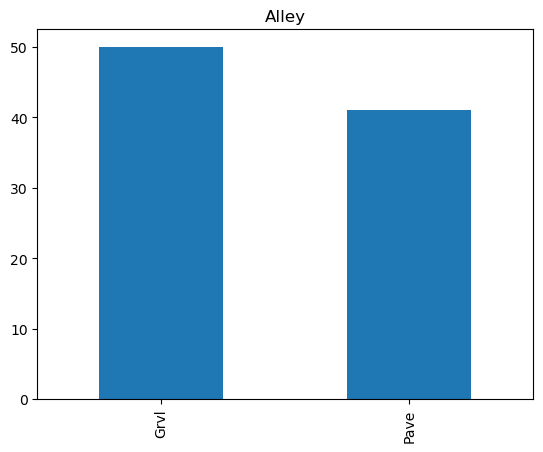

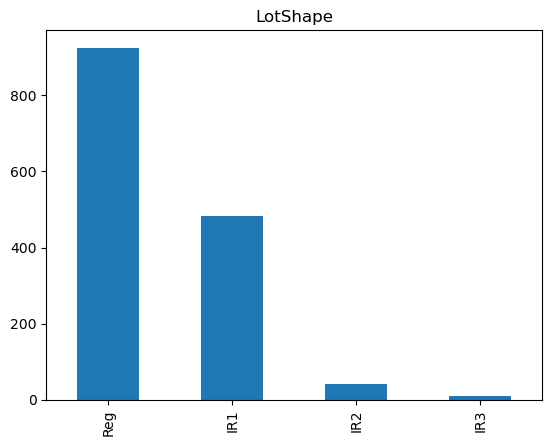

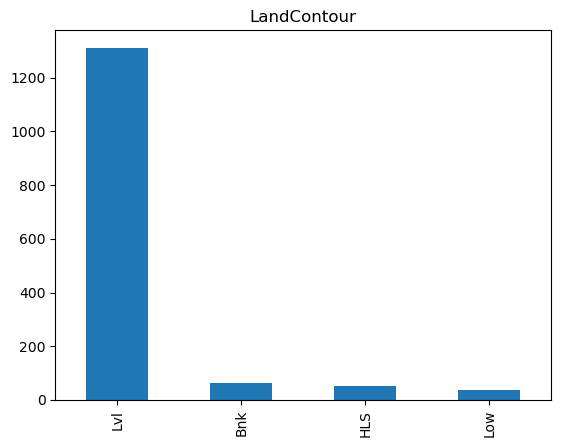

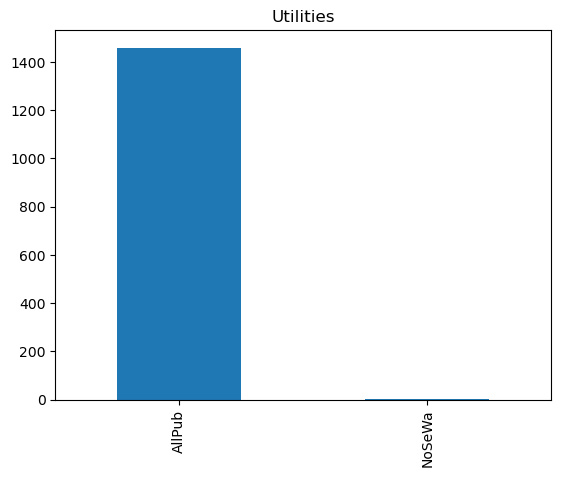

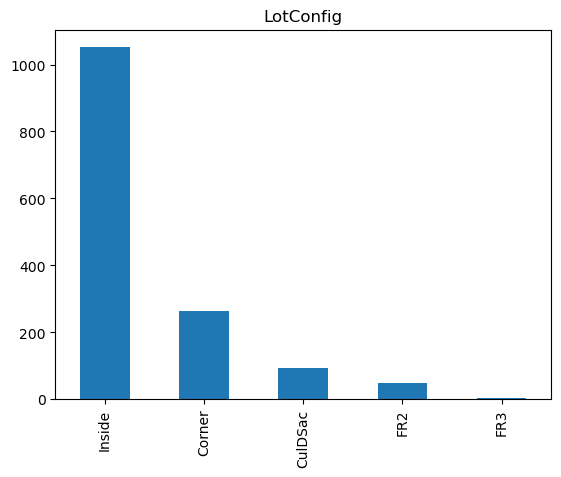

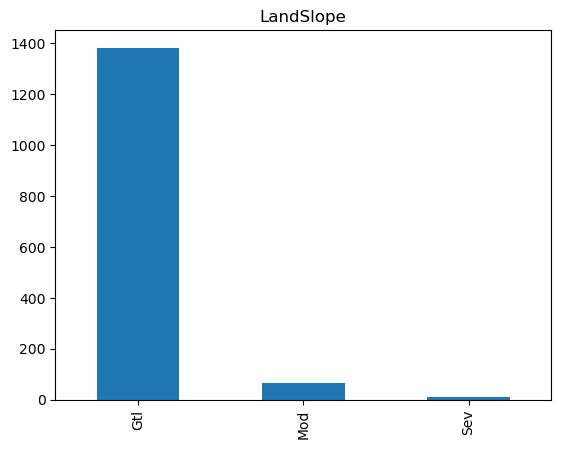

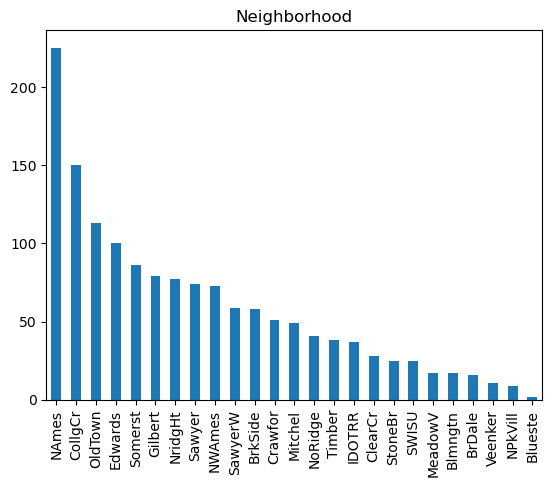

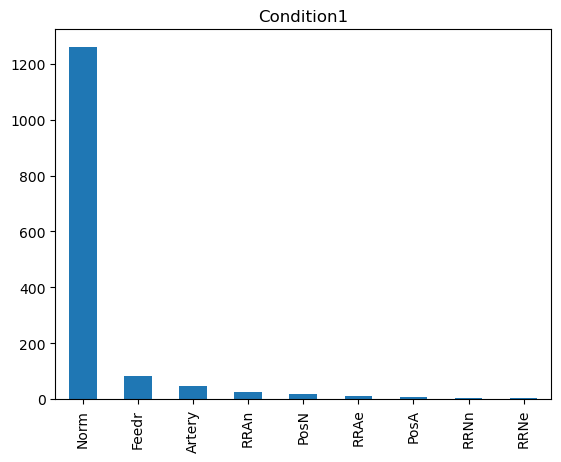

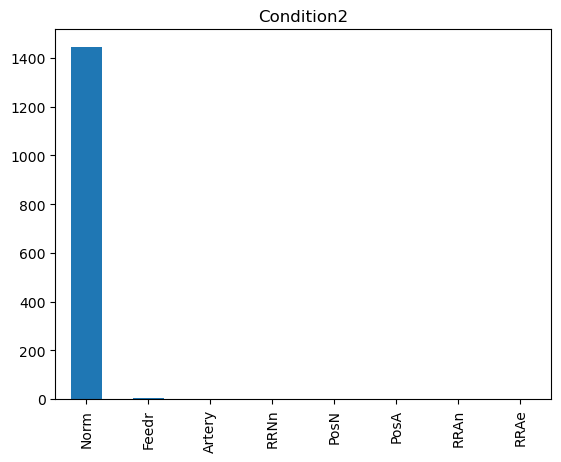

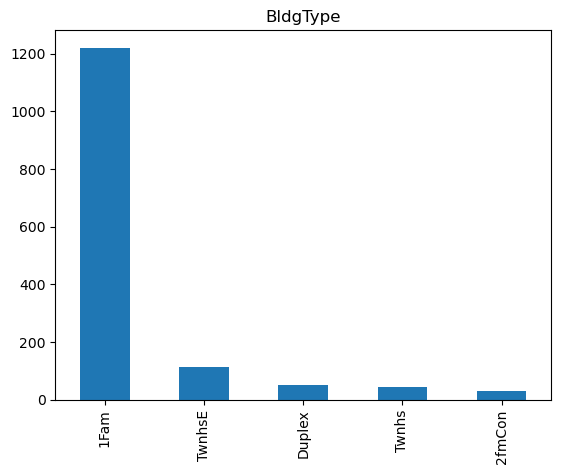

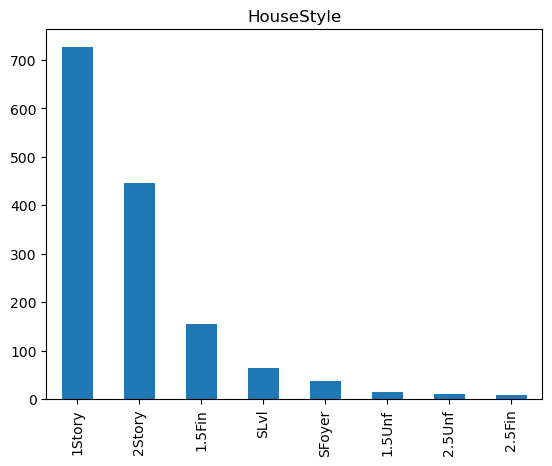

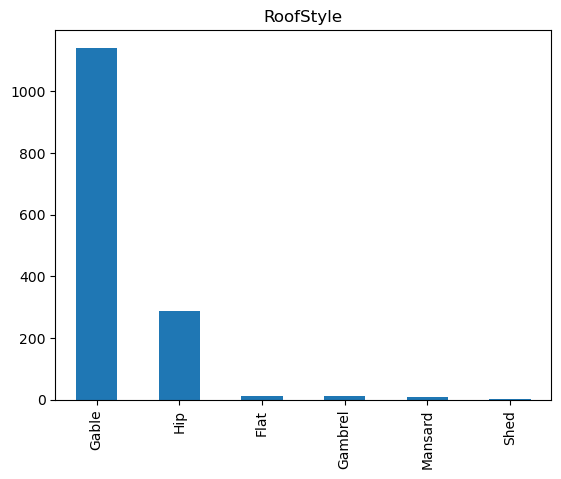

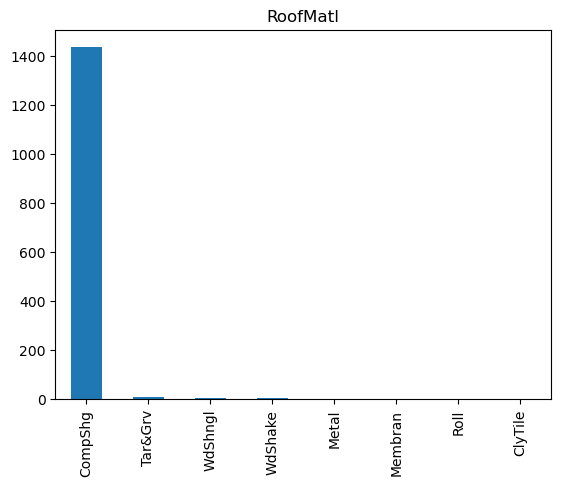

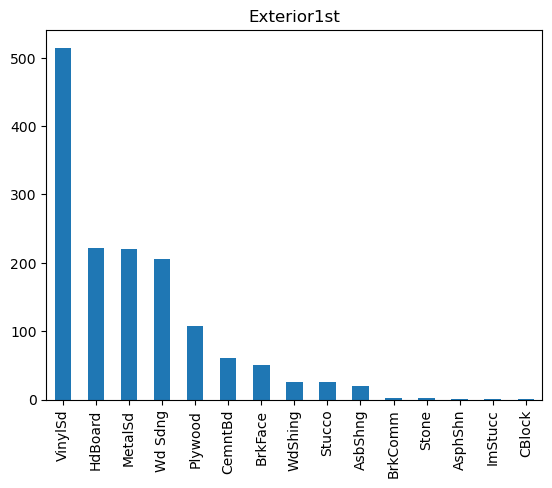

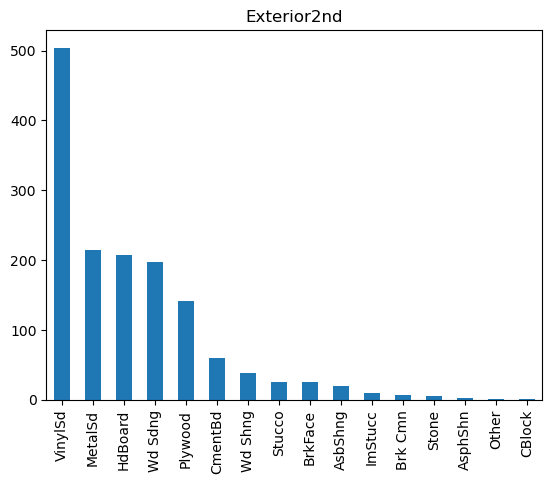

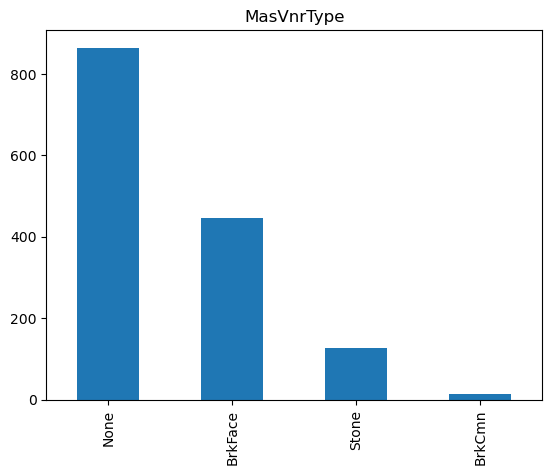

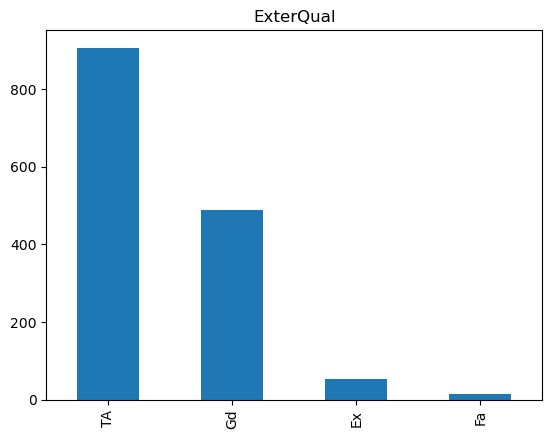

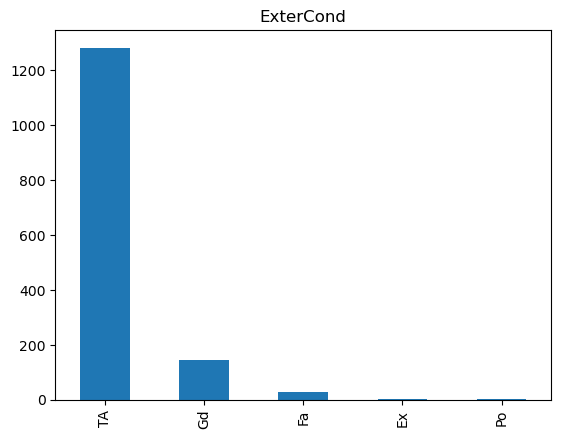

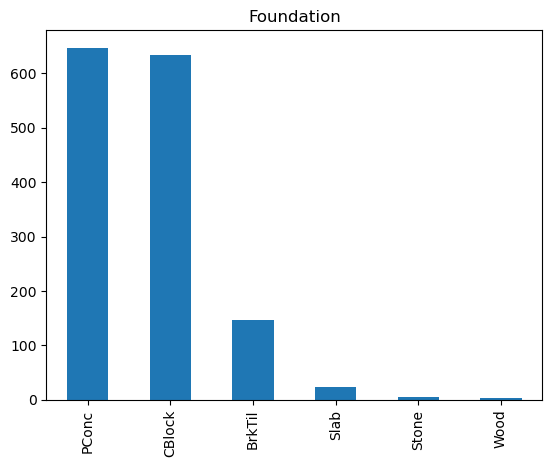

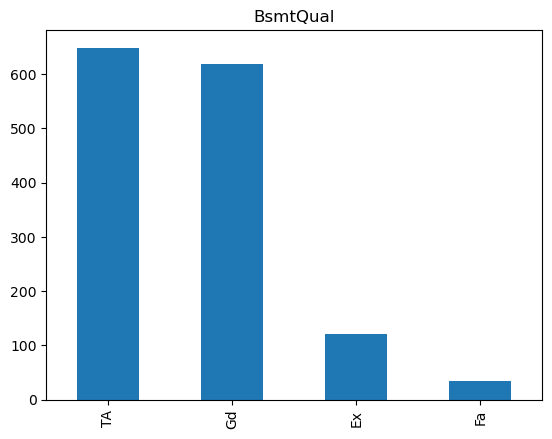

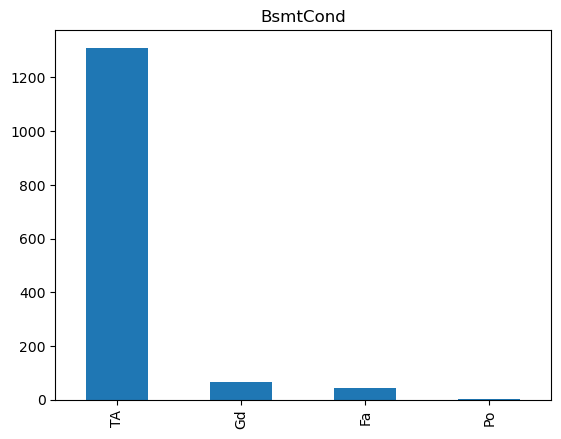

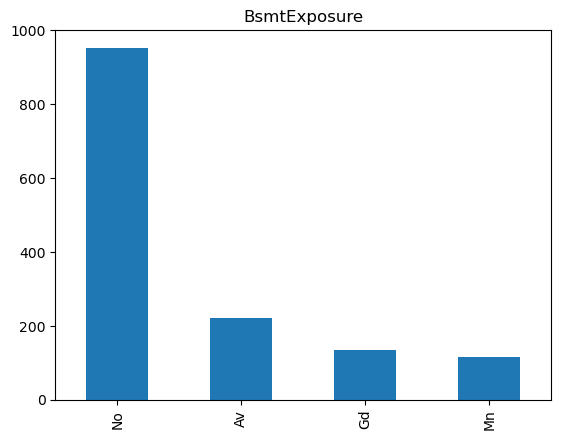

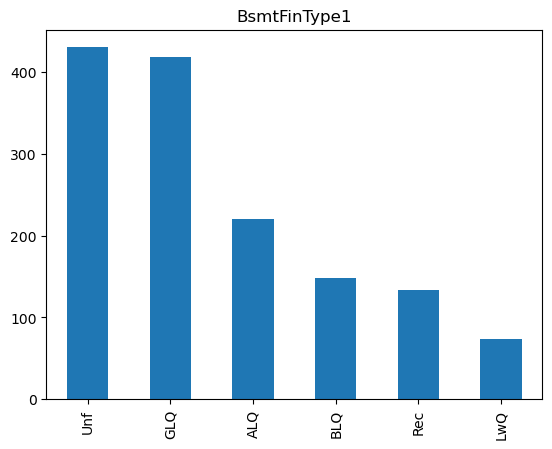

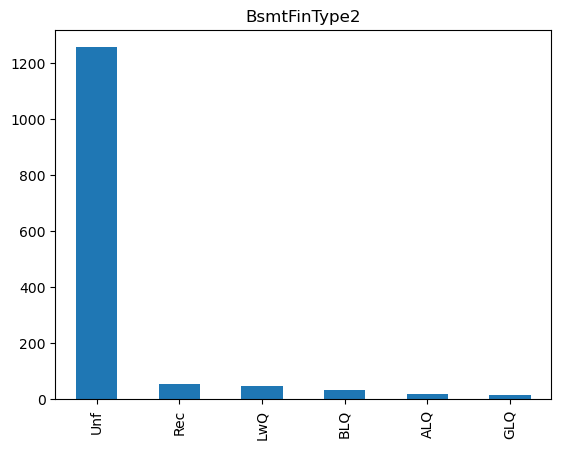

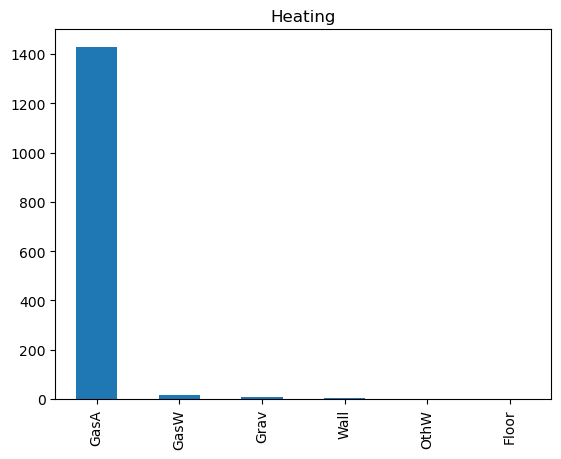

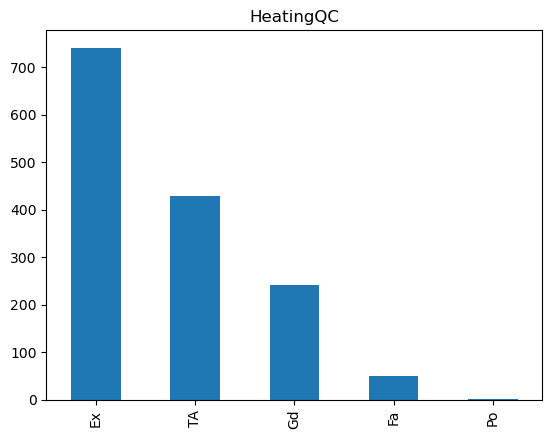

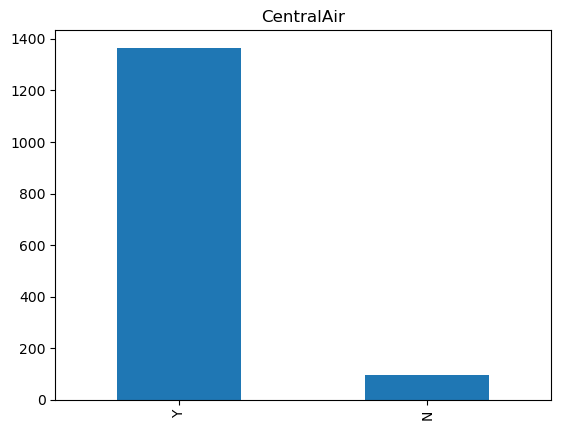

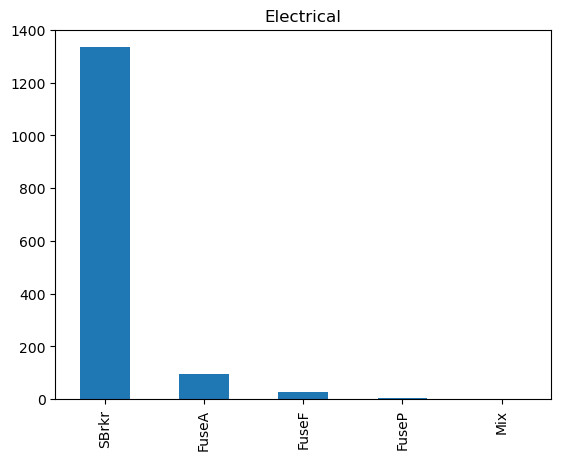

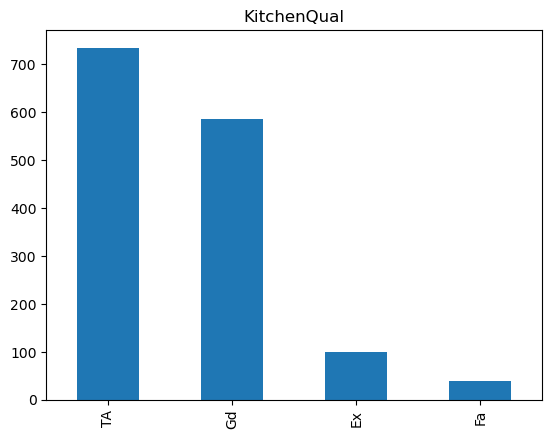

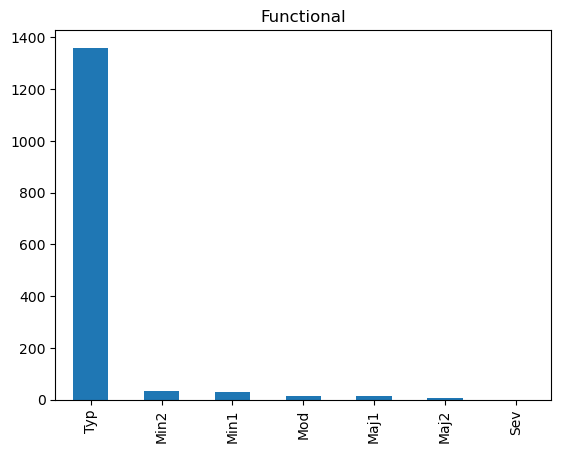

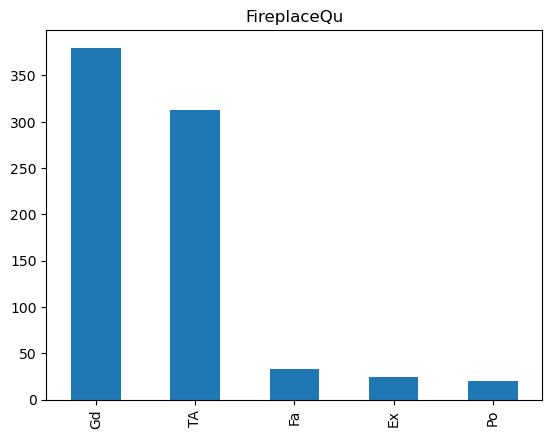

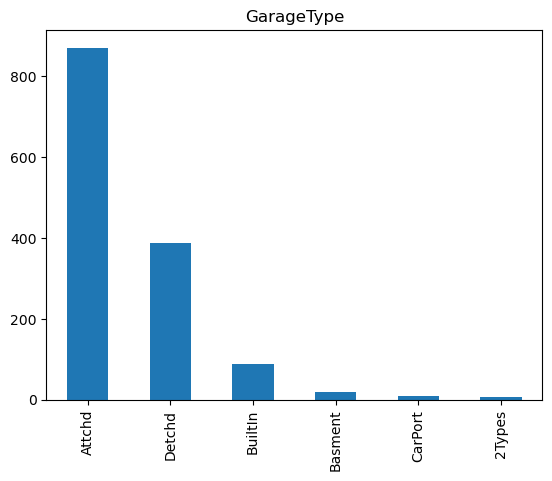

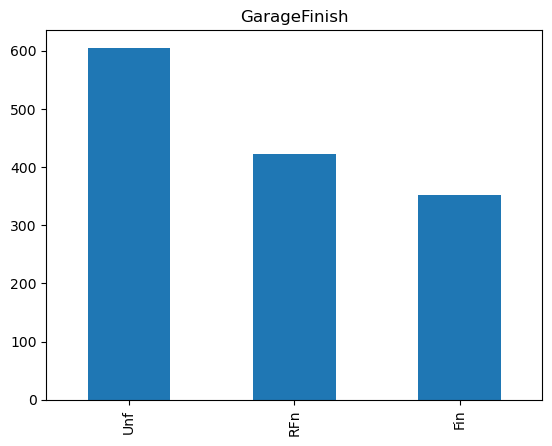

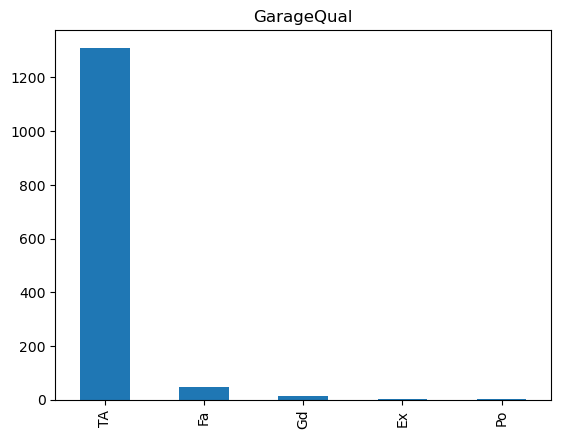

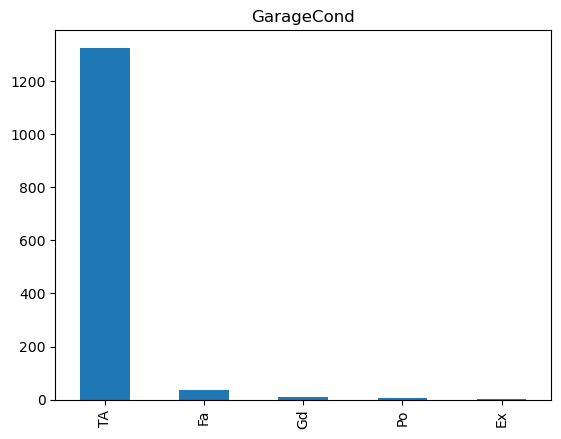

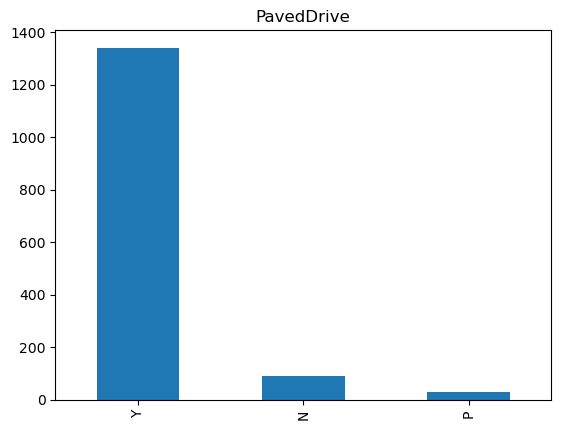

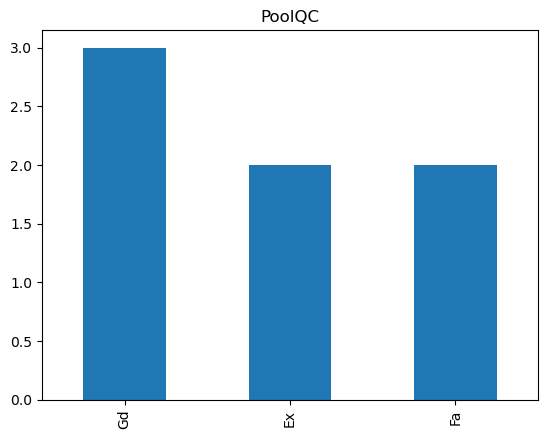

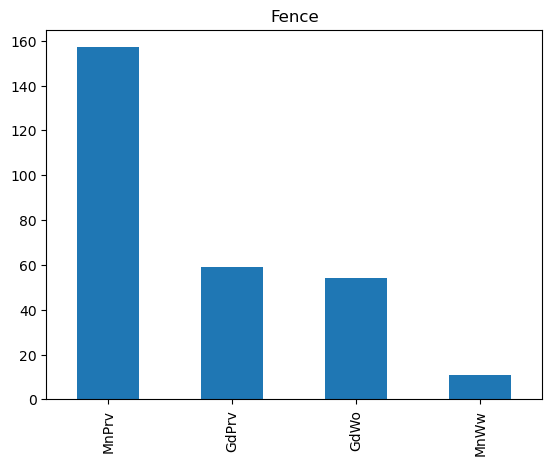

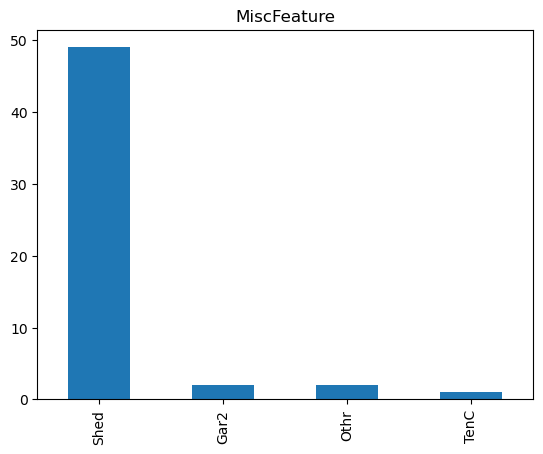

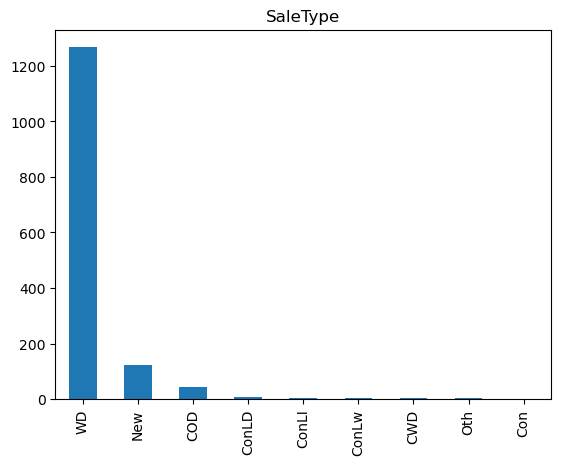

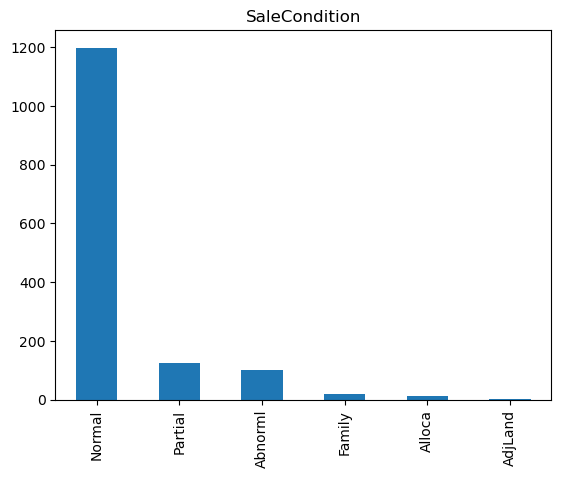

In [13]:
# visualizing the distribution of categorical columns

for col in categorical.columns:
    column_data = categorical[col]
    column_data.value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

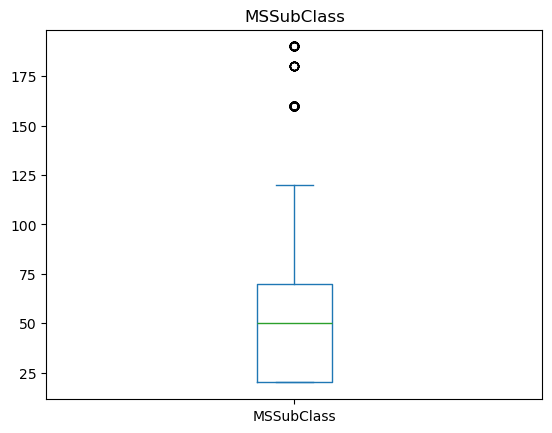

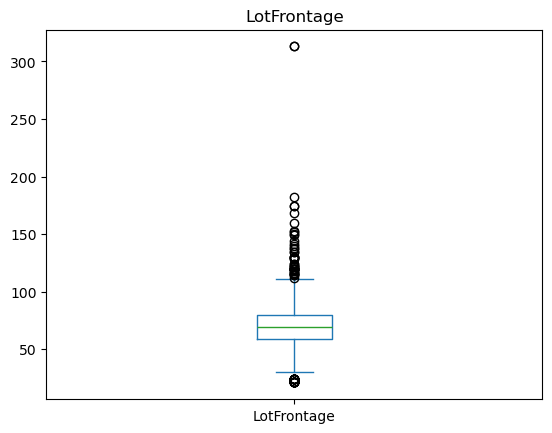

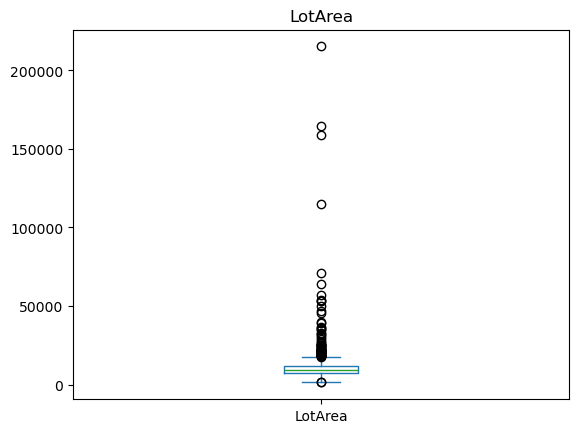

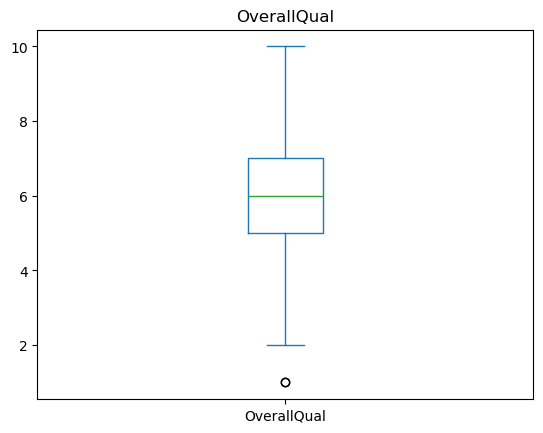

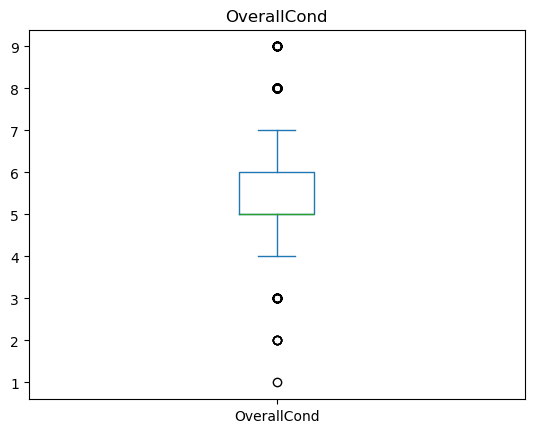

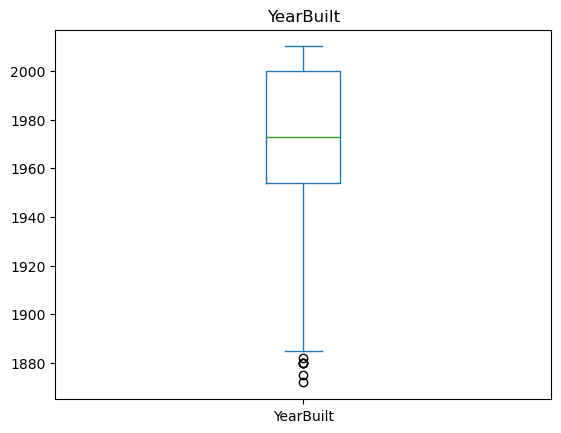

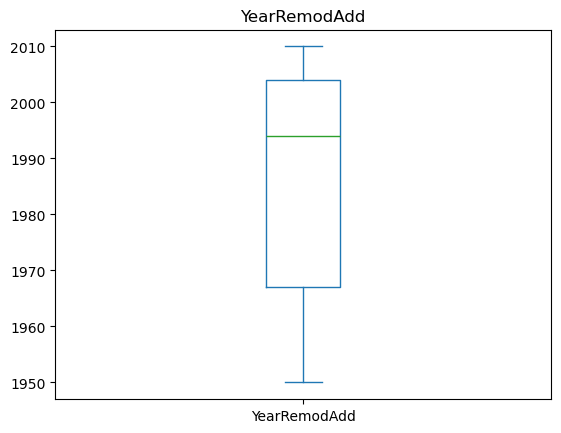

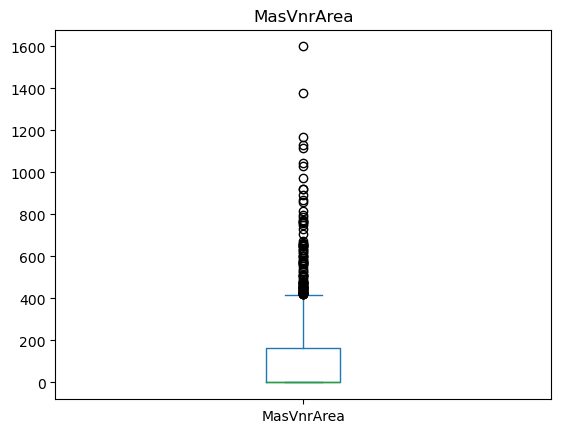

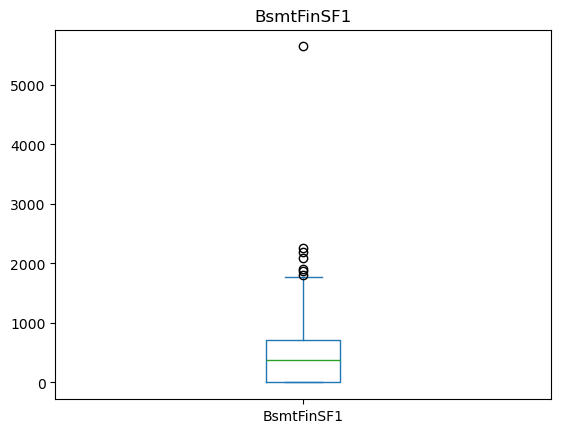

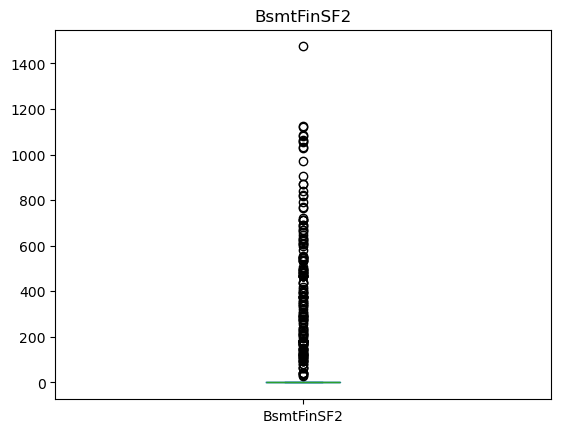

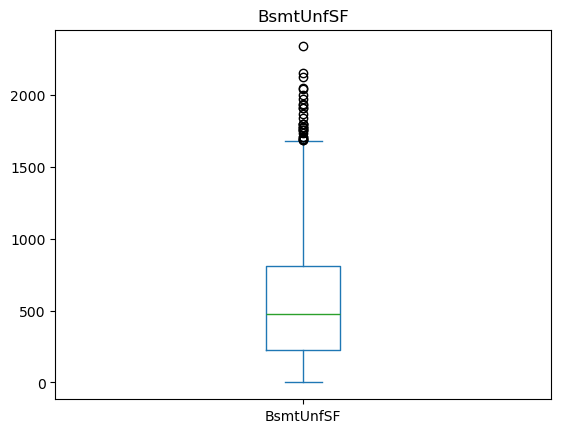

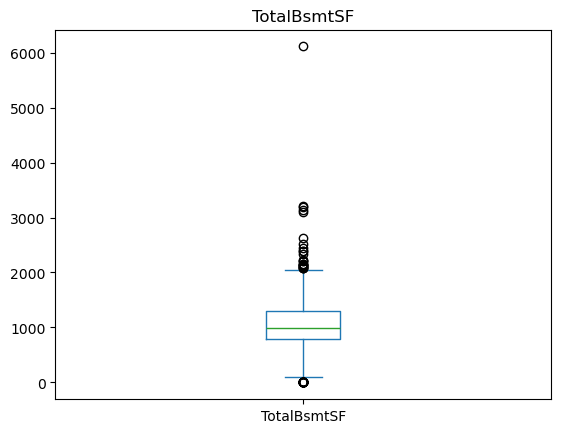

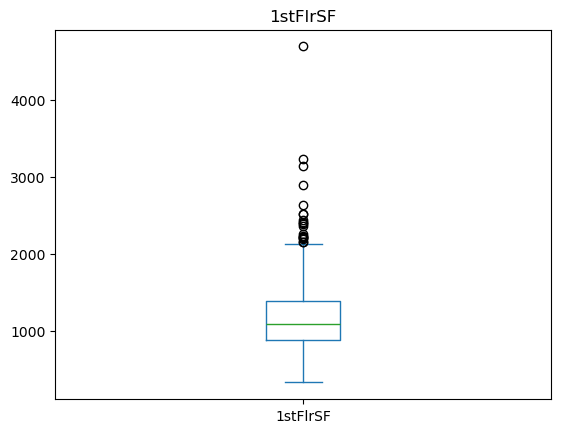

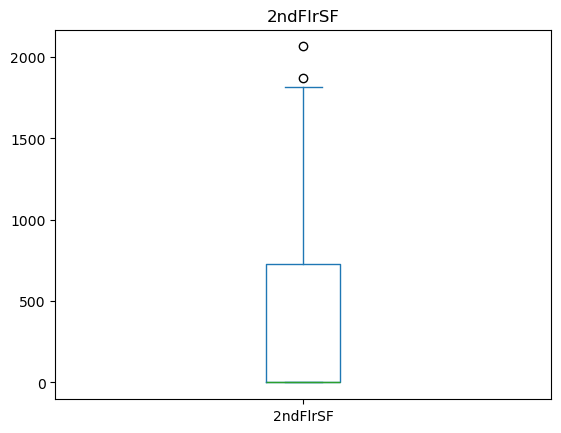

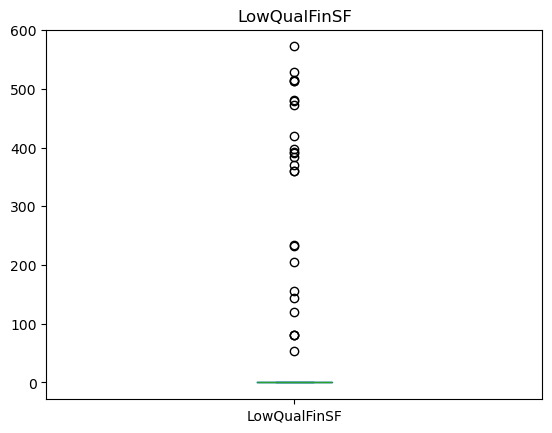

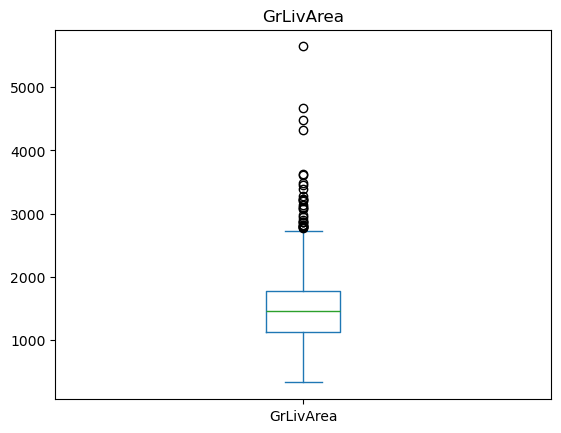

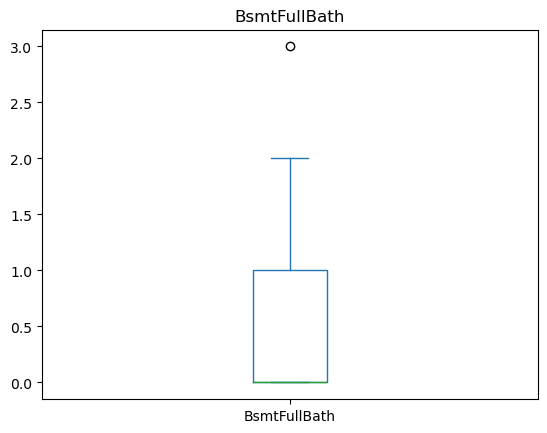

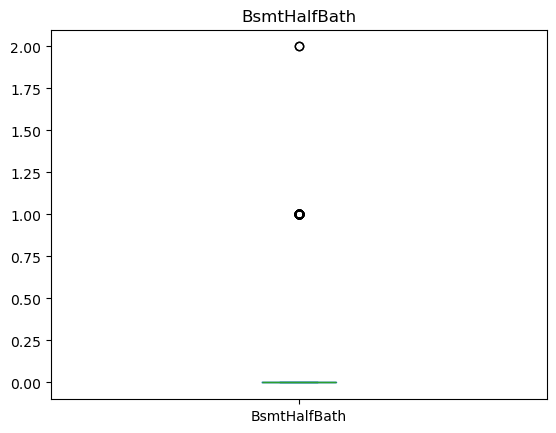

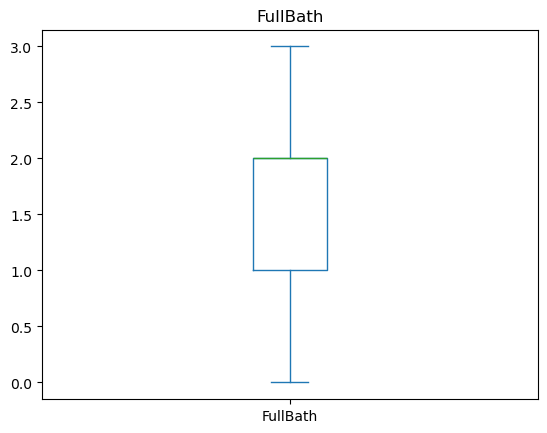

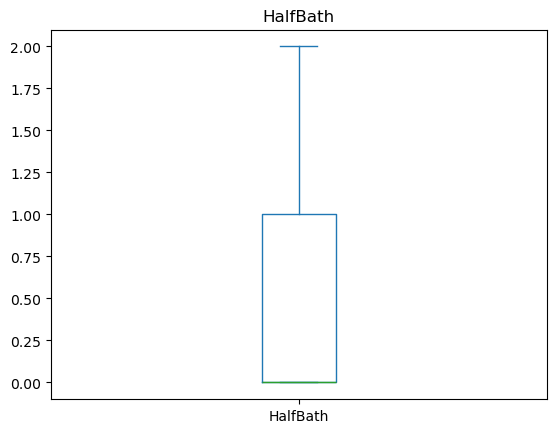

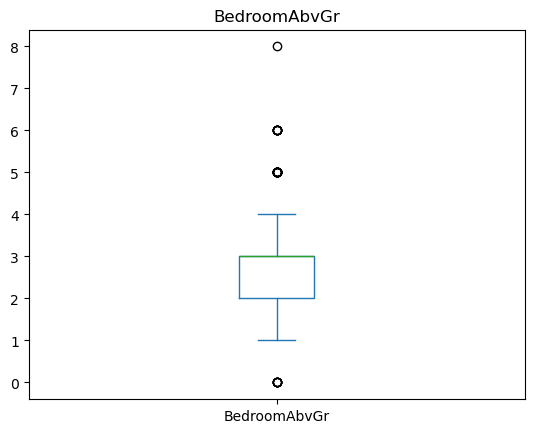

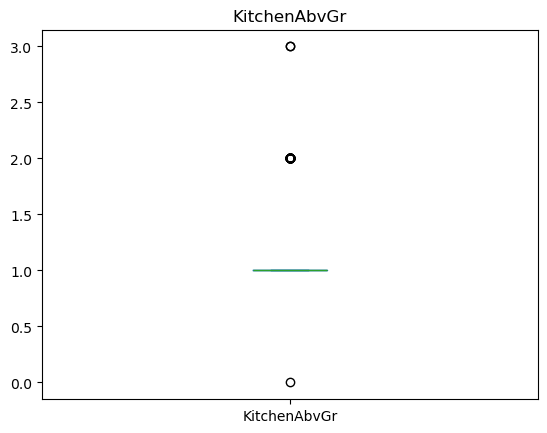

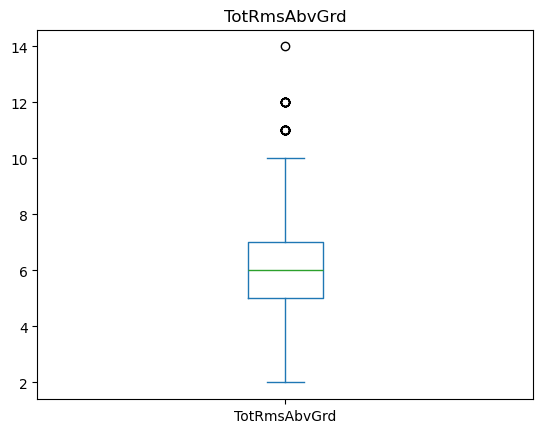

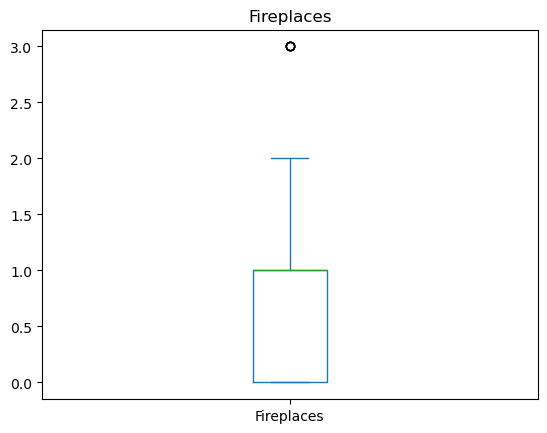

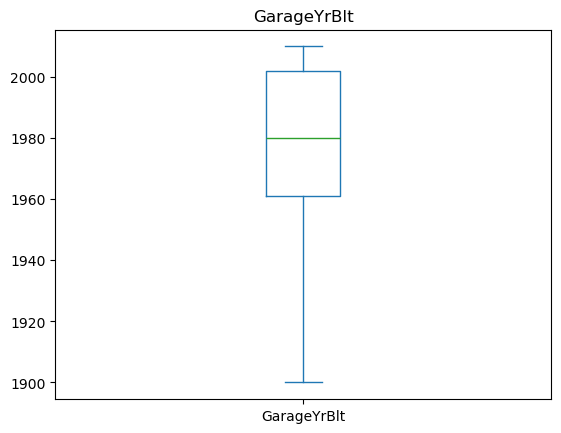

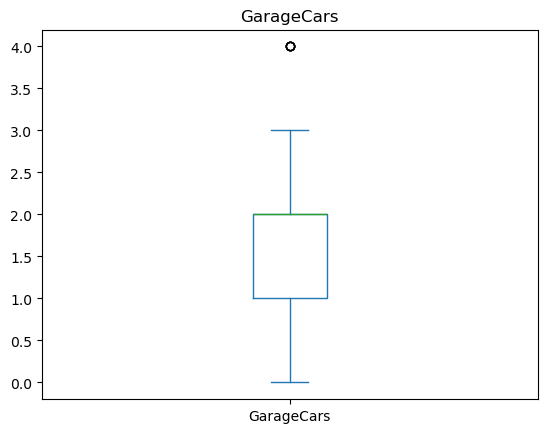

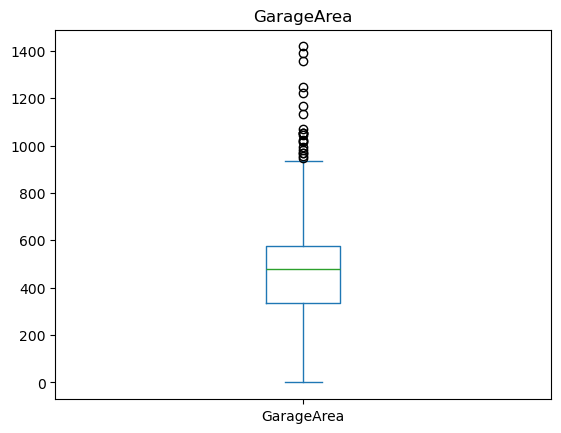

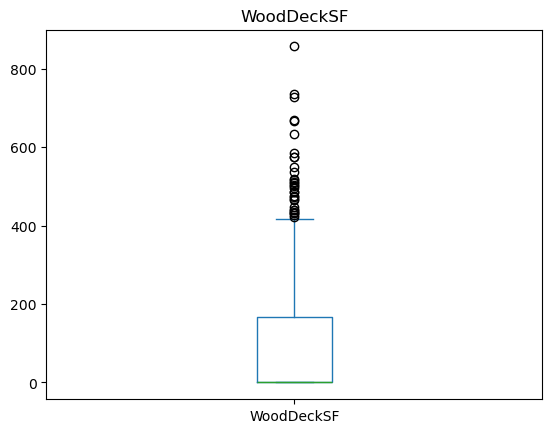

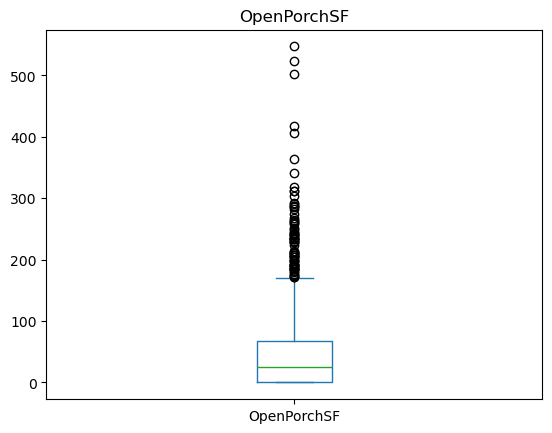

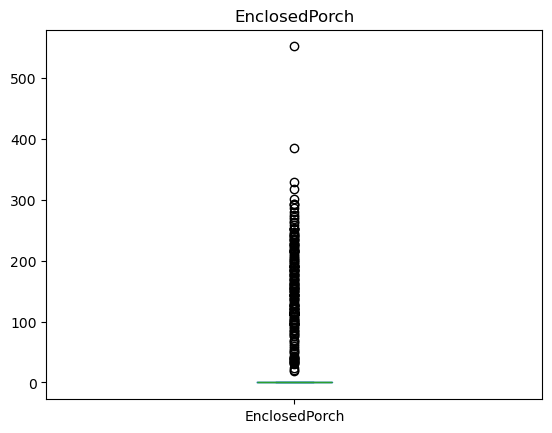

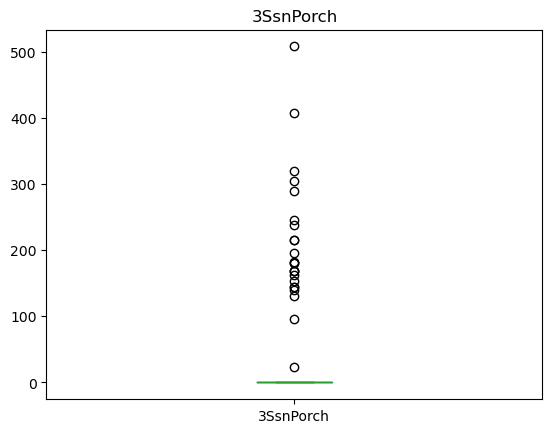

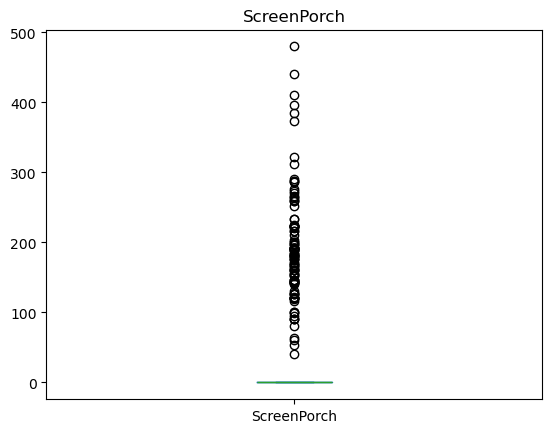

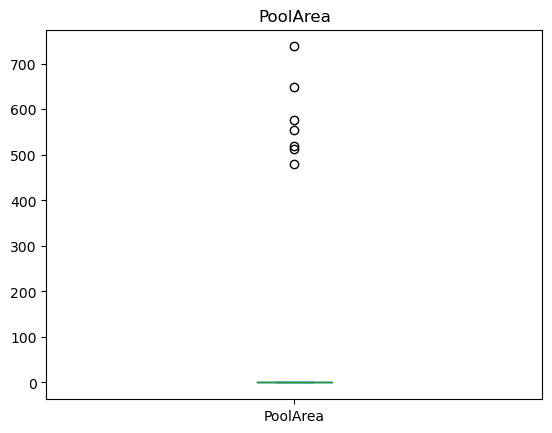

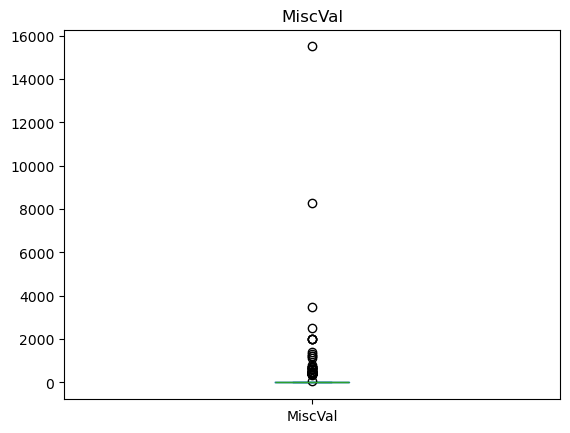

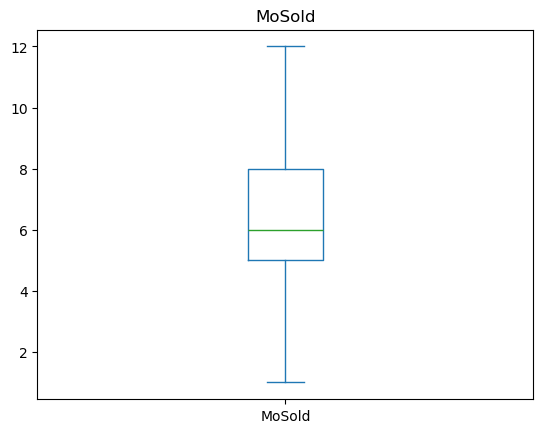

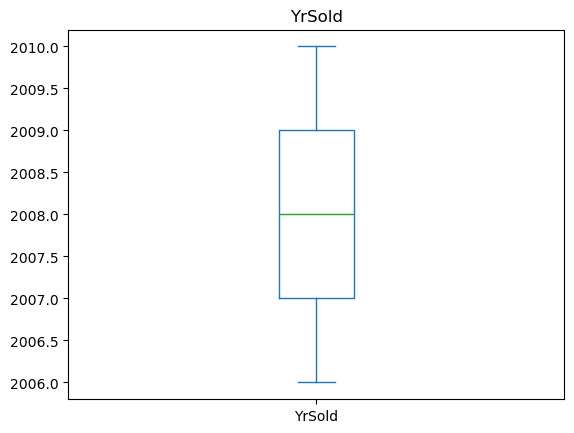

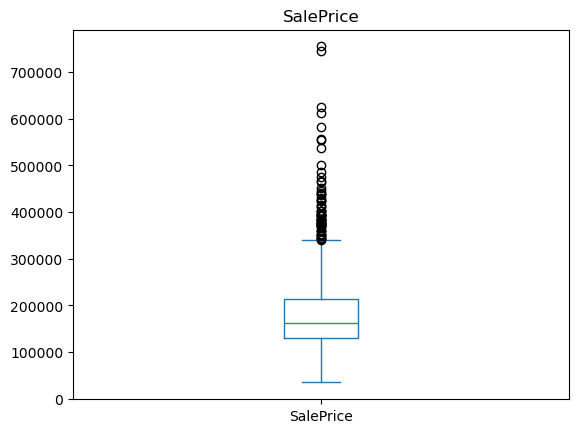

In [14]:
# box plots of numerical columns

for col in numeric.columns:
    column_data = numeric[col]
    column_data.plot(kind='box')
    plt.title(col)
    plt.show()

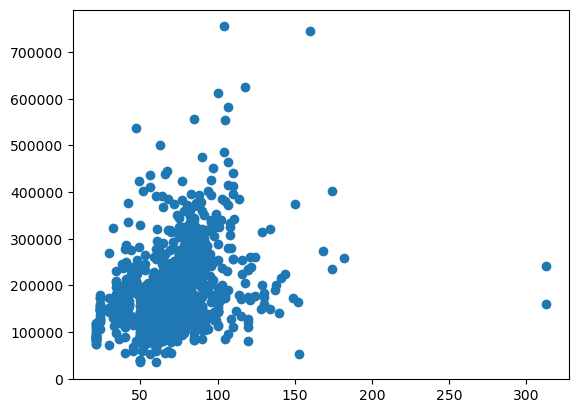

Street
Grvl    85.400000
Pave    69.985786
Name: LotFrontage, dtype: float64

In [16]:
# noticing a significant outlier for LotFrontage, determining
# how to deal with it in order to fill in the missing values
# accurately.
plt.scatter(numeric['LotFrontage'], numeric['SalePrice'])
plt.show()
df.groupby('Street')['LotFrontage'].mean()

Handling Outliers

In [17]:
# I believe my best course of action for LotFrontage is to
# remove the two outliers and fill in the missing values
# based on whether the property is on a gravel or paved road

df.drop(df[df.LotFrontage >= 300].index, inplace=True)

In [18]:
paved_mean = df[df['Street'] == 'Pave']['LotFrontage'].mean()
gravel_mean = df[df['Street'] == 'Grvl']['LotFrontage'].mean()
df.loc[df['Street'] == 'Pave', 'LotFrontage'] = df.loc[df['Street'] == 'Pave', 'LotFrontage'].fillna(paved_mean)
df.loc[df['Street'] == 'Grvl', 'LotFrontage'] = df.loc[df['Street'] == 'Grvl', 'LotFrontage'].fillna(gravel_mean)


<Axes: >

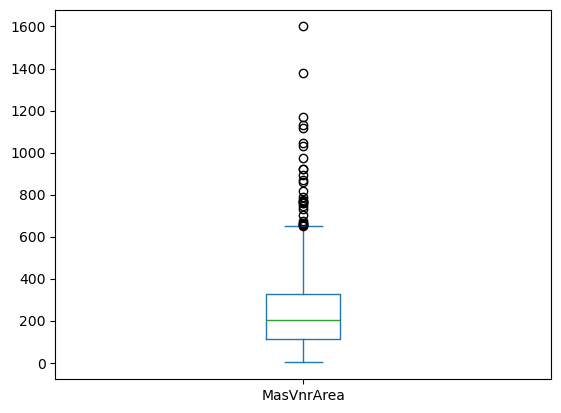

In [19]:
# now looking into MasVnrArea to see how we could handle
# those missing values

df['MasVnrArea'].head(50)
df[df.MasVnrArea != 0].groupby('MasVnrType')['MasVnrArea'].mean()
df[df.MasVnrArea != 0].groupby('HouseStyle')['MasVnrArea'].mean()
df[df.MasVnrArea != 0]['MasVnrArea'].plot(kind='box')

In [20]:
# calculating z scores to determine outliers

masvnr_filtered = df[df['MasVnrArea'] > 1]
mean = masvnr_filtered['MasVnrArea'].mean()
std = masvnr_filtered['MasVnrArea'].std()
df['MasVnrArea_zscore'] = (df['MasVnrArea'] - mean) / std
threshold = 3
df['MasVnrArea_outliers'] = np.where((df['MasVnrArea'] > 1) & (abs(df['MasVnrArea_zscore']) > threshold), True, False)


<Axes: >

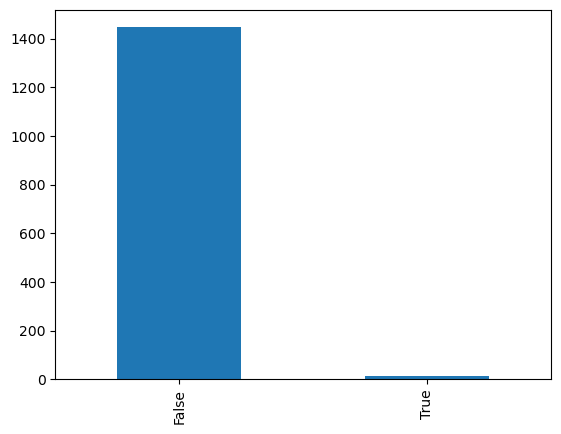

In [21]:
df['MasVnrArea_outliers'].value_counts().plot(kind='bar')

In [22]:
# dropping identified outliers

df.drop(df[df['MasVnrArea_outliers'] == True].index, inplace=True)

In [23]:
df.drop(columns=['MasVnrArea_outliers', 'MasVnrArea_zscore'], inplace=True)

<Axes: ylabel='Frequency'>

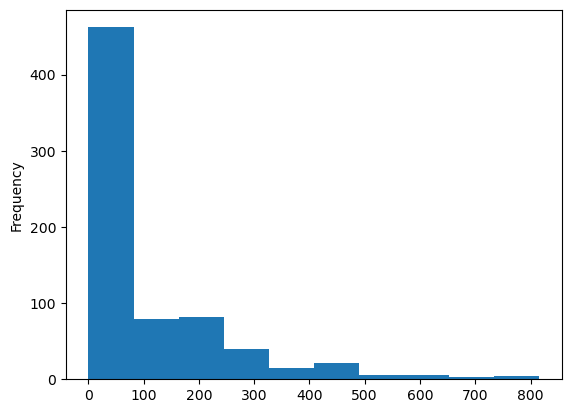

In [24]:
#df[df['MasVnrArea'].isna() == True][df.HouseStyle=='1Story']
df[df.HouseStyle == '1Story']['MasVnrArea'].plot(kind='hist')

In [25]:
df['MasVnrArea'].fillna(0,inplace=True)

Handling Missing Values

In [26]:
df.isna().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage       0.000000
LotArea           0.000000
Street            0.000000
Alley            93.914246
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.553250
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.558783
BsmtCond          2.558783
BsmtExposure      2.627939
BsmtFinType1      2.558783
BsmtFinSF1        0.000000
BsmtFinType2      2.627939
BsmtFinSF2        0.000000
B

In [27]:
# all numeric missing values taken care of, moving onto categorical
# NaN for Alley means no alley
df['Alley'].head(50)
df['Alley'].fillna('None', inplace=True)

In [28]:
# values for these were 0, so no masonry
df[df['MasVnrType'].isna()==True]['MasVnrArea']
df['MasVnrType'].fillna('None', inplace=True)

In [29]:
# As per data description, Na means no basement
df['BsmtQual'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)

In [30]:
missing_elec = df[df['Electrical'].isna()==True].index
df.drop(missing_elec, inplace=True)

In [31]:
df['FireplaceQu'].fillna('None',inplace=True)

In [32]:
# Na means no garage
df['GarageType'].fillna('None', inplace=True)
df['GarageYrBlt'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)

In [33]:
df['PoolQC'].fillna('None', inplace=True)

In [34]:
df['Fence'].fillna('None', inplace=True)

In [35]:
df['MiscFeature'].fillna('None', inplace=True)

In [36]:
# all missing values taken care of
df.isna().sum()/len(df)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

Correlations

In [ ]:

# looking at correlations for numeric columns
correlation_matrix = df.corr()
correlation_matrix

In [38]:
# checking for multicollinearity among numeric columns
mask = (correlation_matrix > 0.7) & (correlation_matrix != 1)
subset_corr_matrix = correlation_matrix[mask]
subset_corr_matrix
# seeing multicollinearity with TotalBsmtSf & 1stFlrSf, GrLivArea &
# TotRmsAbvGrd, GarageCars & GarageArea
# dropping TotalBsmtSf, GrLivArea, & GaragCars
df_subset = df.drop(columns=['TotalBsmtSF','GrLivArea','GarageCars'])

In [39]:
# now looking at correlations with SalePrice for numeric columns
# setting threshold of .4 for correlation, creating new subset of data
new_corr_matrix = df_subset.corr()
new_mask = (new_corr_matrix < 0.4) & (new_corr_matrix != 1)
subset_new_corr_matrix = new_corr_matrix[new_mask]
subset_new_corr_matrix
corr_sale_price = new_corr_matrix['SalePrice']
corr_sale_price
threshold = .4
highcorr_saleprice = corr_sale_price[abs(corr_sale_price) > threshold]
highcorr_saleprice
selected_numeric_df = df_subset[highcorr_saleprice.index]
corr_sale_price

/var/folders/6n/97802hfn6rq181k5lvy7kl_40000gn/T/ipykernel_19808/2697022480.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_corr_matrix = df_subset.corr()


Id              -0.017503
MSSubClass      -0.086566
LotFrontage      0.358889
LotArea          0.259253
OverallQual      0.792798
OverallCond     -0.077720
YearBuilt        0.531614
YearRemodAdd     0.517949
MasVnrArea       0.453672
BsmtFinSF1       0.404212
BsmtFinSF2      -0.006248
BsmtUnfSF        0.209976
1stFlrSF         0.622396
2ndFlrSF         0.294989
LowQualFinSF    -0.024430
BsmtFullBath     0.238221
BsmtHalfBath    -0.034885
FullBath         0.554086
HalfBath         0.280518
BedroomAbvGr     0.156404
KitchenAbvGr    -0.137798
TotRmsAbvGrd     0.529489
Fireplaces       0.468748
GarageArea       0.632319
WoodDeckSF       0.315305
OpenPorchSF      0.334371
EnclosedPorch   -0.128805
3SsnPorch        0.048726
ScreenPorch      0.119983
PoolArea         0.105011
MiscVal         -0.020440
MoSold           0.055986
YrSold          -0.018383
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [40]:
# new df with selected features for numeric columns
selected_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1445 non-null   int64  
 1   YearBuilt     1445 non-null   int64  
 2   YearRemodAdd  1445 non-null   int64  
 3   MasVnrArea    1445 non-null   float64
 4   BsmtFinSF1    1445 non-null   int64  
 5   1stFlrSF      1445 non-null   int64  
 6   FullBath      1445 non-null   int64  
 7   TotRmsAbvGrd  1445 non-null   int64  
 8   Fireplaces    1445 non-null   int64  
 9   GarageArea    1445 non-null   int64  
 10  SalePrice     1445 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 135.5 KB


In [74]:
#overriding categorical variable to reflect data cleaning
categorical = df.select_dtypes(include=object)
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1445 non-null   object
 1   Street         1445 non-null   object
 2   Alley          1445 non-null   object
 3   LotShape       1445 non-null   object
 4   LandContour    1445 non-null   object
 5   Utilities      1445 non-null   object
 6   LotConfig      1445 non-null   object
 7   LandSlope      1445 non-null   object
 8   Neighborhood   1445 non-null   object
 9   Condition1     1445 non-null   object
 10  Condition2     1445 non-null   object
 11  BldgType       1445 non-null   object
 12  HouseStyle     1445 non-null   object
 13  RoofStyle      1445 non-null   object
 14  RoofMatl       1445 non-null   object
 15  Exterior1st    1445 non-null   object
 16  Exterior2nd    1445 non-null   object
 17  MasVnrType     1445 non-null   object
 18  ExterQual      1445 non-null

Encoding

In [75]:
# hot encoding categorical columns
categorical_processed = pd.get_dummies(categorical)
categorical_processed.head(10)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1900.0,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932

In [76]:
# merging selected numeric columns with encoded categorical columns
selected_numeric_dummy_df = pd.concat([categorical_processed,selected_numeric_df], axis=1)

In [77]:
selected_numeric_dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 374 entries, MSZoning_C (all) to SalePrice
dtypes: float64(1), int64(10), uint8(363)
memory usage: 680.0 KB


In [78]:
# new corr matrix for new df
selected_corr_matrix = selected_numeric_dummy_df.corr()

In [79]:
# checking for multicollinearity in new df with threshold of .7
# removing columns with possible multicollinearity
mask1 = (selected_corr_matrix > 0.7) & (selected_corr_matrix != 1)
selected_subset_corr_matrix = selected_corr_matrix[mask1]
selected_subset_corr_matrix = selected_subset_corr_matrix.dropna(how="all", axis=1)
selected_subset_corr_matrix = selected_subset_corr_matrix.dropna(how="all", axis=0)
selected_subset_corr_matrix
#SaleCondition_Partial & SaleType_New, MiscFeature_Gar2 & Condition2_RRAe, Condition2_RRAe & RoofStyle_Shed,
# RoofStyle_Flat & RoofMatl_Tar&Grv, All Exterior1 and Exterior 2, All Garage Cond and Garage Qual
selected_numeric_dummy_df.drop(columns=['SaleCondition_Partial', 'Condition2_RRAe', 'Exterior2nd_AsbShng',
                                       'Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd',
                                       'Exterior2nd_Plywood', 'Exterior2nd_Stucco','Exterior2nd_VinylSd',
                                       'Exterior2nd_Wd Sdng','GarageQual_Ex','GarageQual_TA',], inplace=True)

In [85]:
# now subsetting for only those columns with high correlation with sales price
# setting a threshold of .4
new_corr_dummy_matrix = selected_numeric_dummy_df.corr()
new_mask1 = (new_corr_dummy_matrix < 0.4) & (new_corr_dummy_matrix != 1)
subset_new_corr_dummy_matrix = new_corr_dummy_matrix[new_mask1]
subset_new_corr_dummy_matrix
corr_dummy_sale_price = new_corr_dummy_matrix['SalePrice']
corr_dummy_sale_price
threshold = .4
highcorr_dummy_saleprice = corr_dummy_sale_price[abs(corr_dummy_sale_price) > threshold]
highcorr_dummy_saleprice
new_preprocessed_df = selected_numeric_dummy_df[highcorr_dummy_saleprice.index]

In [87]:
new_preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Neighborhood_NridgHt  1445 non-null   uint8  
 1   ExterQual_Ex          1445 non-null   uint8  
 2   ExterQual_Gd          1445 non-null   uint8  
 3   ExterQual_TA          1445 non-null   uint8  
 4   Foundation_PConc      1445 non-null   uint8  
 5   BsmtQual_Ex           1445 non-null   uint8  
 6   BsmtQual_TA           1445 non-null   uint8  
 7   BsmtFinType1_GLQ      1445 non-null   uint8  
 8   HeatingQC_Ex          1445 non-null   uint8  
 9   KitchenQual_Ex        1445 non-null   uint8  
 10  KitchenQual_TA        1445 non-null   uint8  
 11  FireplaceQu_None      1445 non-null   uint8  
 12  GarageFinish_Fin      1445 non-null   uint8  
 13  GarageFinish_Unf      1445 non-null   uint8  
 14  OverallQual           1445 non-null   int64  
 15  YearBuilt            

In [91]:
# taking out features that don't make sense to keep in since others
# were taken out (also had low correlation)
new_preprocessed_df.drop(columns=['Neighborhood_NridgHt','BsmtFinType1_GLQ',
                                 'FireplaceQu_None', 'Foundation_PConc','HeatingQC_Ex',
                                 'BsmtFinSF1'], inplace=True)

KeyError: "['Neighborhood_NridgHt', 'BsmtFinType1_GLQ', 'FireplaceQu_None', 'Foundation_PConc', 'HeatingQC_Ex', 'BsmtFinSF1'] not found in axis"

Normalizing

In [101]:
# MasVnrArea is highly skewed so applying yeo-johnson transformation
new_preprocessed_df['MasVnrArea'].describe()
transformer = PowerTransformer(method='yeo-johnson')
new_preprocessed_df['MasVnrArea_PowerTransformed'] = transformer.fit_transform(new_preprocessed_df[['MasVnrArea']])

/var/folders/6n/97802hfn6rq181k5lvy7kl_40000gn/T/ipykernel_19808/2488958104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_preprocessed_df['MasVnrArea_PowerTransformed'] = transformer.fit_transform(new_preprocessed_df[['MasVnrArea']])


In [112]:
# min maxing year built, year remod add, 1stFlrSF, GarageArea, and SalePrice
scaler = MinMaxScaler()
new_preprocessed_df['YearBuilt_minmax'] = scaler.fit_transform(new_preprocessed_df[['YearBuilt']])

/var/folders/6n/97802hfn6rq181k5lvy7kl_40000gn/T/ipykernel_19808/3541682914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_preprocessed_df['YearBuilt_minmax'] = scaler.fit_transform(new_preprocessed_df[['YearBuilt']])


In [113]:
new_preprocessed_df['YearRemodAdd_minmax'] = scaler.fit_transform(new_preprocessed_df[['YearRemodAdd']])

/var/folders/6n/97802hfn6rq181k5lvy7kl_40000gn/T/ipykernel_19808/3846815461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_preprocessed_df['YearRemodAdd_minmax'] = scaler.fit_transform(new_preprocessed_df[['YearRemodAdd']])


In [116]:
new_preprocessed_df['1stFlrSF'].describe()
new_preprocessed_df['1stFlrSF_minmax'] = scaler.fit_transform(new_preprocessed_df[['1stFlrSF']])

/var/folders/6n/97802hfn6rq181k5lvy7kl_40000gn/T/ipykernel_19808/2760979015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_preprocessed_df['1stFlrSF_minmax'] = scaler.fit_transform(new_preprocessed_df[['1stFlrSF']])


In [119]:
new_preprocessed_df['GarageArea_minmax'] = scaler.fit_transform(new_preprocessed_df[['GarageArea']])

/var/folders/6n/97802hfn6rq181k5lvy7kl_40000gn/T/ipykernel_19808/99386540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_preprocessed_df['GarageArea_minmax'] = scaler.fit_transform(new_preprocessed_df[['GarageArea']])


In [122]:
new_preprocessed_df['SalePrice_minmax'] = scaler.fit_transform(new_preprocessed_df[['SalePrice']])

/var/folders/6n/97802hfn6rq181k5lvy7kl_40000gn/T/ipykernel_19808/3594575727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_preprocessed_df['SalePrice_minmax'] = scaler.fit_transform(new_preprocessed_df[['SalePrice']])


In [124]:
new_preprocessed_df.head(50)
modelready_df = new_preprocessed_df.drop(columns=['YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', 'GarageArea', 'SalePrice'])

In [128]:
# our final dataset
modelready_df.head(50)

,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,BsmtQual_Ex,BsmtQual_TA,KitchenQual_Ex,KitchenQual_TA,GarageFinish_Fin,GarageFinish_Unf,OverallQual,FullBath,TotRmsAbvGrd,Fireplaces,MasVnrArea_PowerTransformed,YearBuilt_minmax,YearRemodAdd_minmax,1stFlrSF_minmax,GarageArea_minmax,SalePrice_minmax
0,0,1,0,0,0,0,0,0,0,7,2,8,0,1.249812,0.949275,0.883333,0.180373,0.394245,0.244473
1,0,0,1,0,0,0,1,0,0,6,2,6,1,-0.810800,0.753623,0.433333,0.320663,0.330935,0.206450
2,0,1,0,0,0,0,0,0,0,7,2,6,1,1.214076,0.934783,0.866667,0.202488,0.437410,0.265596
3,0,0,1,0,1,0,0,0,1,7,1,7,1,-0.810800,0.311594,0.333333,0.216655,0.461871,0.148007
4,0,1,0,0,0,0,0,0,0,8,2,9,1,1.348656,0.927536,0.833333,0.280235,0.601439,0.302915
5,0,0,1,0,0,0,1,0,1,5,1,5,0,-0.810800,0.876812,0.750000,0.159641,0.345324,0.152232
6,0,1,0,1,0,0,0,0,0,8,2,7,1,1.240158,0.956522,0.916667,0.469938,0.457554,0.383185
7,0,0,1,0,0,0,1,0,0,7,2,7,2,1.285982,0.731884,0.383333,0.267104,0.348201,0.232502
8,0,0,1,0,1,0,1,0,1,7,2,8,2,-0.810800,0.427536,0.000000,0.237733,0.336691,0.133784
9,0,0,1,0,1,0,1,0,0,5,1,5,2,-0.810800,0.485507,0.000000,0.256738,0.147482,0.117026
